# Importing necessary libraries

In [1]:
import pandas as pd
from scipy.stats import skew
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# 1] DATASET ACQUISITION AND UNDERSTANDING 

## a] Loading the data

In [2]:
train_df=pd.read_csv("train_genetic_disorders.csv")

## b] Checking The data Dimension

In [3]:
#Import the training_set_features data into Python environment as a Pandas DataFrame.
data1=pd.read_csv(r'C:/Users/HP/Desktop/dataset/train_genetic_disorders.csv')
data1

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418          2.0                    Yes                    No   
1      PID0x25d5          4.0                    Yes                   Yes   
2      PID0x4a82          6.0                    Yes                    No   
3      PID0x4ac8         12.0                    Yes                    No   
4      PID0x1bf7         11.0                    Yes                    No   
...          ...          ...                    ...                   ...   
21006   PID0x26c         11.0                     No                   Yes   
21007   PID0xa01          NaN                     No                    No   
21008    PID0x15          5.0                    Yes                    No   
21009  PID0x8d32          1.0                    Yes                    No   
21010  PID0x883d         13.0                     No                   Yes   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0               Yes            No                4.760603            Richard   
1                No            No                4.910669               Mike   
2                No            No                4.893297           Kimberly   
3               Yes            No                4.705280            Jeffery   
4               NaN           Yes                4.720703            Johanna   
...             ...           ...                     ...                ...   
21006           Yes            No                5.090495              Betty   
21007            No           Yes                5.214750               Beth   
21008           Yes           Yes                5.084831              Craig   
21009            No           Yes                5.224828          Francisco   
21010           Yes            No                5.137942              Byron   

      Family Name Father's name  ...  Birth defects  \
0             NaN         Larre  ...            NaN   
1             NaN        Brycen  ...       Multiple   
2             NaN        Nashon  ...       Singular   
3       Hoelscher        Aayaan  ...       Singular   
4        Stutzman         Suave  ...       Multiple   
...           ...           ...  ...            ...   
21006         NaN        Letwan  ...       Multiple   
21007         NaN      Trayvion  ...       Singular   
21008    Frascone       Shivaan  ...       Multiple   
21009        Owen          Dyer  ...       Multiple   
21010     Keating         Owens  ...       Multiple   

       White Blood cell count (thousand per microliter)  Blood test result  \
0                                              9.857562                NaN   
1                                              5.522560             normal   
2                                                   NaN             normal   
3                                              7.919321       inconclusive   
4                                              4.098210                NaN   
...                                                 ...                ...   
21006                                               NaN             normal   
21007                                          7.086312  slightly abnormal   
21008                                          7.924746                NaN   
21009                                         12.000000       inconclusive   
21010                                          6.751866       inconclusive   

      Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0           1.0       1.0       1.0       1.0        1.0   
1           1.0       NaN       1.0       1.0        0.0   
2           0.0       1.0       1.0       1.0        1.0   
3           0.0       0.0       1.0       0.0        0.0   
4           0.0       0.0       0.0       0.0        NaN   
...         ...       ...       ...       ...        ...   
21006       1.0       NaN       0.0       0.0        0.0   
21007       1.0       NaN     

# There are 21011 rows and 45 columns in the dataset(Original)

## C] Display of top 5 row tuples from head

In [4]:
train_df.head()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   
2  PID0x4a82          6.0                    Yes                    No   
3  PID0x4ac8         12.0                    Yes                    No   
4  PID0x1bf7         11.0                    Yes                    No   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   
2            No            No                4.893297           Kimberly   
3           Yes            No                4.705280            Jeffery   
4           NaN           Yes                4.720703            Johanna   

  Family Name Father's name  ...  Birth defects  \
0         NaN         Larre  ...            NaN   
1         NaN        Brycen  ...       Multiple   
2         NaN        Nashon  ...       Singular   
3   Hoelscher        Aayaan  ...       Singular   
4    Stutzman         Suave  ...       Multiple   

   White Blood cell count (thousand per microliter) Blood test result  \
0                                          9.857562               NaN   
1                                          5.522560            normal   
2                                               NaN            normal   
3                                          7.919321      inconclusive   
4                                          4.098210               NaN   

  Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
0       1.0       1.0       1.0       1.0        1.0   
1       1.0       NaN       1.0       1.0        0.0   
2       0.0       1.0       1.0       1.0        1.0   
3       0.0       0.0       1.0       0.0        0.0   
4       0.0       0.0       0.0       0.0        NaN   

                               Genetic Disorder  \
0   Mitochondrial genetic inheritance disorders   
1                                           NaN   
2  Multifactorial genetic inheritance disorders   
3   Mitochondrial genetic inheritance disorders   
4  Multifactorial genetic inheritance disorders   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  
2                             Diabetes  
3                       Leigh syndrome  
4                               Cancer  

[5 rows x 45 columns]

## D] Display of bottom 5 row tuples

In [52]:
train_df.tail()

Patient Id  Patient Age Genes in mother's side Inherited from father  \
21006   PID0x26c         11.0                     No                   Yes   
21007   PID0xa01          NaN                     No                    No   
21008    PID0x15          5.0                    Yes                    No   
21009  PID0x8d32          1.0                    Yes                    No   
21010  PID0x883d         13.0                     No                   Yes   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
21006           Yes            No                5.090495              Betty   
21007            No           Yes                5.214750               Beth   
21008           Yes           Yes                5.084831              Craig   
21009            No           Yes                5.224828          Francisco   
21010           Yes            No                5.137942              Byron   

      Family Name Father's name  ...  Birth defects  \
21006         NaN        Letwan  ...       Multiple   
21007         NaN      Trayvion  ...       Singular   
21008    Frascone       Shivaan  ...       Multiple   
21009        Owen          Dyer  ...       Multiple   
21010     Keating         Owens  ...       Multiple   

       White Blood cell count (thousand per microliter)  Blood test result  \
21006                                               NaN             normal   
21007                                          7.086312  slightly abnormal   
21008                                          7.924746                NaN   
21009                                         12.000000       inconclusive   
21010                                          6.751866       inconclusive   

      Symptom 1 Symptom 2 Symptom 3 Symptom 4  Symptom 5  \
21006       1.0       NaN       0.0       0.0        0.0   
21007       1.0       NaN       1.0       0.0        1.0   
21008       1.0       0.0       0.0       1.0        1.0   
21009       0.0       1.0       1.0       1.0        0.0   
21010       1.0       0.0       1.0       0.0        0.0   

                                   Genetic Disorder       Disorder Subclass  
21006              Single-gene inheritance diseases               Tay-Sachs  
21007   Mitochondrial genetic inheritance disorders          Leigh syndrome  
21008  Multifactorial genetic inheritance disorders                     NaN  
21009   Mitochondrial genetic inheritance disorders  Mitochondrial myopathy  
21010   Mitochondrial genetic inheritance disorders          Leigh syndrome  

[5 rows x 45 columns]

# c] Count of Categorial and Numerical variables(Examining the datatypes)

In [4]:
# Count the number of categorical and numerical variables
import pandas as pd
train_df = pd.read_csv('train_genetic_disorders.csv')
categorical_count = train_df.select_dtypes(include='object').shape[1]
numerical_count = train_df.select_dtypes(exclude='float64').shape[1]

print(f"Number of categorical variables: {categorical_count}")
print(f"Number of numerical variables: {numerical_count}")

Number of categorical variables: 29
Number of numerical variables: 29


### Number of Categorical Features: 29
### Number of Numerical Features: 16

## d] Reviewing the Features Description(meaning of each feature)

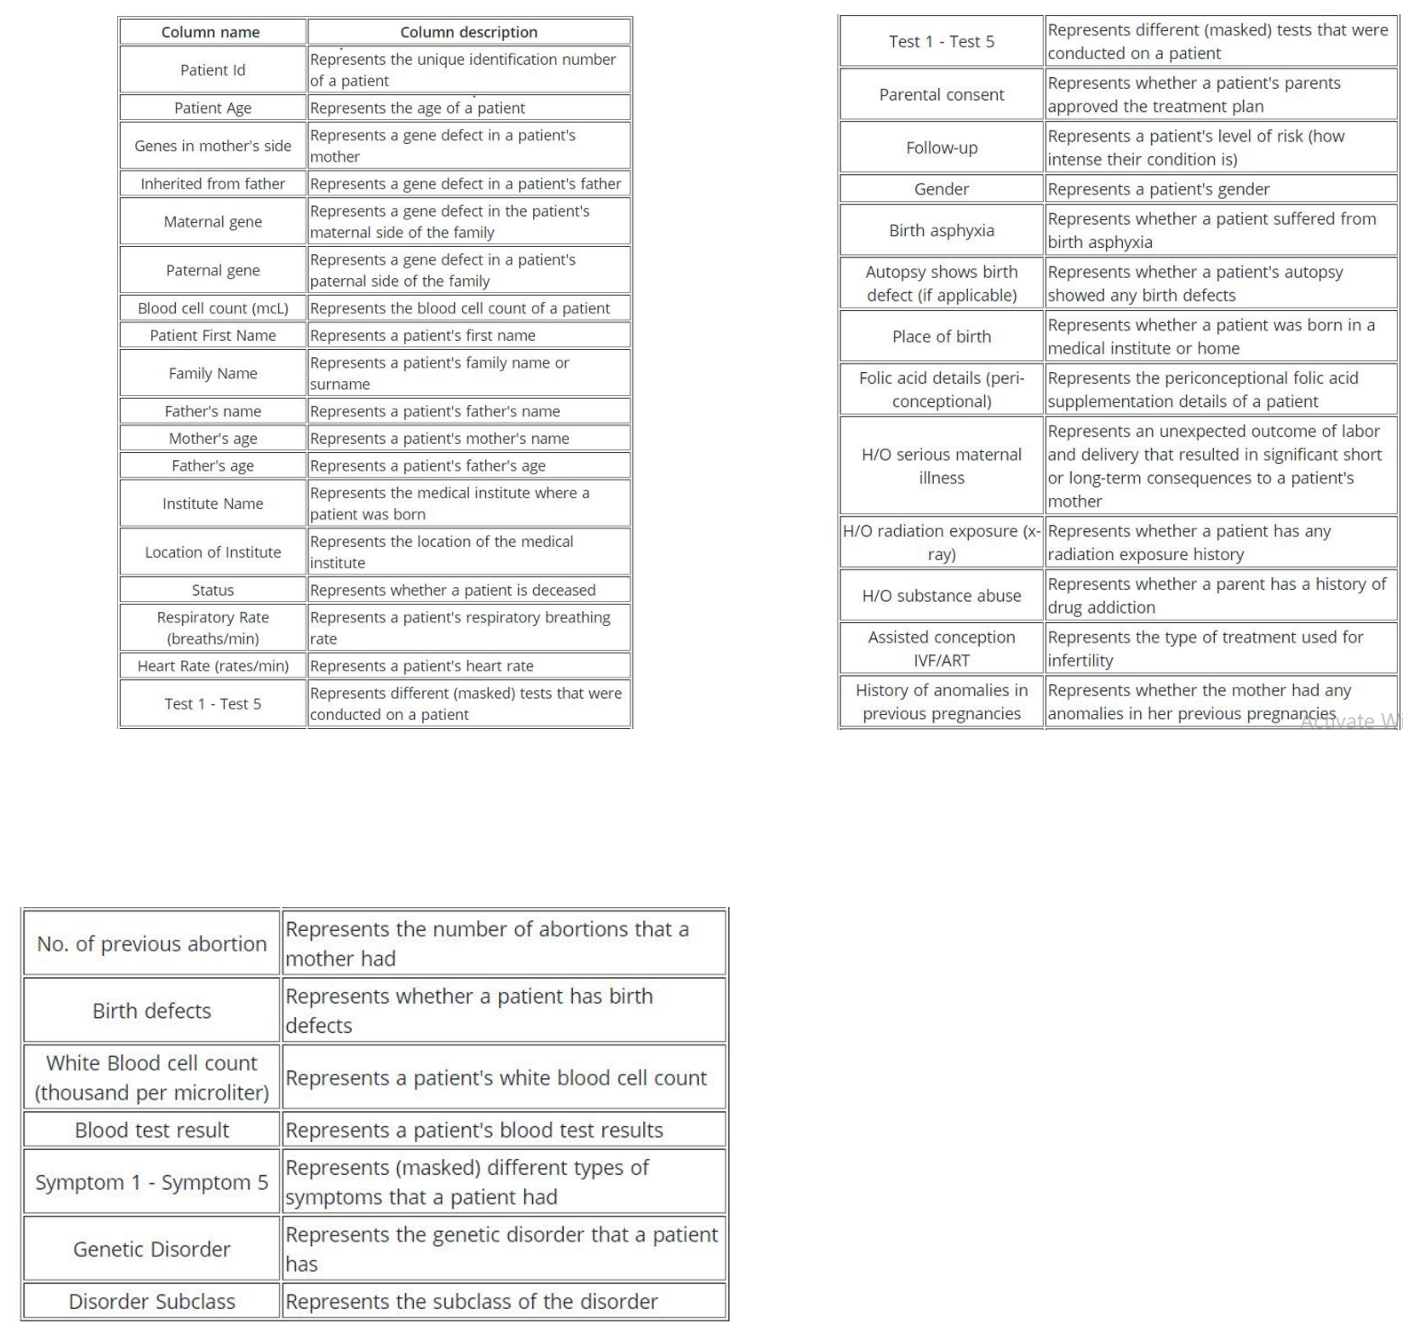

In [6]:
from PIL import Image
import matplotlib.pyplot as plt

# Paths to the PNG images
img_path1 = 'features1.png'
img_path2 = 'features2.png'
img_path3 = 'features3.png'

# Open the images
img1 = Image.open(img_path1)
img2 = Image.open(img_path2)
img3 = Image.open(img_path3)

# Create a figure with a 2x2 grid layout for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))  # Adjust figsize as needed

# Display the first image in the first subplot
axes[0, 0].imshow(img1)
axes[0, 0].axis('off')  # Hide the axes

# Display the second image in the second subplot
axes[0, 1].imshow(img2)
axes[0, 1].axis('off')  # Hide the axes

# Display the third image in the third subplot
axes[1, 0].imshow(img3)
axes[1, 0].axis('off')  # Hide the axes

# Remove the fourth subplot (bottom-right) as it's not needed
fig.delaxes(axes[1, 1])

# Show the images
plt.tight_layout()
plt.show()


# 2] INITIAL DATA EXPLORATION


## a] Identifying datatype, unique values ,null/missing values ,non null values and duplicates for each variable or features

In [7]:
from tabulate import tabulate

# Summary statistics
summary_stats = train_df.describe()

# Number of non-null values in each column
non_null_count = train_df.count()

# Data types of each column
data_types = train_df.dtypes

# Unique values in each column
unique_values = train_df.nunique()

# Missing values in each column
mv=train_df.isnull().sum()

# Combine all the information into a dataset description DataFrame
data_description = pd.DataFrame({
    'Data Types': data_types,
    'Non-Null Count': non_null_count,
    'Unique Values': unique_values,
    'Missing Values':mv,
})

# Print the dataset description in a nice table format
print("Dataset Description:")
print(tabulate(data_description, headers='keys', tablefmt='pretty'))

Dataset Description:
+--------------------------------------------------+------------+----------------+---------------+----------------+
|                                                  | Data Types | Non-Null Count | Unique Values | Missing Values |
+--------------------------------------------------+------------+----------------+---------------+----------------+
|                    Patient Id                    |   object   |     21011      |     21011     |       0        |
|                   Patient Age                    |  float64   |     19643      |      15       |      1368      |
|              Genes in mother's side              |   object   |     21011      |       2       |       0        |
|              Inherited from father               |   object   |     20724      |       2       |      287       |
|                  Maternal gene                   |   object   |     18317      |       2       |      2694      |
|                  Paternal gene                   

## Finding  duplicates

In [8]:
#finding duplicates
train_df.duplicated().sum()

0

# b] Calculating summary statistics: 
## i] Computing descriptive statistics such as mean, median, standard deviation etc for NUMERICAL FEATURES

In [9]:
#descriptive statistics for numerical features
train_df.describe()

Patient Age  Blood cell count (mcL)  Mother's age  Father's age  \
count  19643.000000            21011.000000  15293.000000  15322.000000   
mean       6.974851                4.899004     34.522527     41.942436   
std        4.322584                0.199829      9.847256     13.027701   
min        0.000000                4.092727     18.000000     20.000000   
25%        3.000000                4.763230     26.000000     31.000000   
50%        7.000000                4.899548     35.000000     42.000000   
75%       11.000000                5.033977     43.000000     53.000000   
max       14.000000                5.609829     51.000000     64.000000   

        Test 1   Test 2   Test 3   Test 4   Test 5  No. of previous abortion  \
count  18992.0  18958.0  18970.0  18962.0  18939.0              18957.000000   
mean       0.0      0.0      0.0      1.0      0.0                  2.000106   
std        0.0      0.0      0.0      0.0      0.0                  1.411488   
min        0.0      0.0      0.0      1.0      0.0                  0.000000   
25%        0.0      0.0      0.0      1.0      0.0                  1.000000   
50%        0.0      0.0      0.0      1.0      0.0                  2.000000   
75%        0.0      0.0      0.0      1.0      0.0                  3.000000   
max        0.0      0.0      0.0      1.0      0.0                  4.000000   

       White Blood cell count (thousand per microliter)     Symptom 1  \
count                                      18965.000000  18955.000000   
mean                                           7.484680      0.592034   
std                                            2.653633      0.491470   
min                                            3.000000      0.000000   
25%                                            5.419026      0.000000   
50%                                            7.473071      1.000000   
75%                                            9.528684      1.000000   
max                                           12.000000      1.000000   

          Symptom 2     Symptom 3     Symptom 4     Symptom 5  
count  18899.000000  19008.000000  18987.000000  18956.000000  
mean       0.552886      0.537405      0.497393      0.460804  
std        0.497208      0.498612      0.500006      0.498474  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000      0.000000  
50%        1.000000      1.000000      0.000000      0.000000  
75%        1.000000      1.000000      1.000000      1.000000  
max        1.000000      1.000000      1.000000      1.000000

In [95]:
#finding the mode of each feature

from tabulate import tabulate
# Summary statistics
summary_stats = train_df.describe()
# Mode (most frequent value) of each column
modes = train_df.mode().iloc[0]
data_description = pd.DataFrame({
  'Mode': modes,
})

# Print the dataset description in a nice table format
print("Dataset Description:")
print(tabulate(data_description, headers='keys', tablefmt='pretty'))


Dataset Description:
+--------------------------------------------------+---------------------------------------------+
|                                                  |                    Mode                     |
+--------------------------------------------------+---------------------------------------------+
|                    Patient Id                    |                   PID0x1                    |
|                   Patient Age                    |                    12.0                     |
|              Genes in mother's side              |                     Yes                     |
|              Inherited from father               |                     No                      |
|                  Maternal gene                   |                     Yes                     |
|                  Paternal gene                   |                     No                      |
|              Blood cell count (mcL)              |                 4.092727034        

## ii] Descpritive Statistics for Categorical features

In [10]:
#descriptive statistics for Cateorical features
train_df.describe(include="object")

Patient Id Genes in mother's side Inherited from father Maternal gene  \
count       21011                  21011                 20724         18317   
unique      21011                      2                     2             2   
top     PID0x6418                    Yes                    No           Yes   
freq            1                  12509                 12508         10125   

       Paternal gene Patient First Name Family Name Father's name  \
count          21011              21011       11771         21011   
unique             2               2480        6051         15777   
top               No              James       Smith         Sager   
freq           11887                394         151             6   

        Institute Name Location of Institute  ...  \
count            16151                 21011  ...   
unique              27                    26  ...   
top     Not applicable                     -  ...   
freq              8011                 10386  ...   

       Folic acid details (peri-conceptional) H/O serious maternal illness  \
count                                   18998                        18959   
unique                                      2                            2   
top                                       Yes                           No   
freq                                     9625                         9500   

       H/O radiation exposure (x-ray) H/O substance abuse  \
count                           18964               18921   
unique                              4                   4   
top                    Not applicable                   -   
freq                             4807                4797   

       Assisted conception IVF/ART  \
count                        19007   
unique                           2   
top                            Yes   
freq                          9555   

       History of anomalies in previous pregnancies Birth defects  \
count                                         18945         18959   
unique                                            2             2   
top                                             Yes      Singular   
freq                                           9605          9509   

        Blood test result                             Genetic Disorder  \
count               18977                                        18962   
unique                  4                                            3   
top     slightly abnormal  Mitochondrial genetic inheritance disorders   
freq                 4855                                         9686   

       Disorder Subclass  
count              18943  
unique                 9  
top       Leigh syndrome  
freq                4893  

[4 rows x 29 columns]

## iii] Descpritive Statistics for ALL datatype features

In [11]:
#descriptive statistics for all features
train_df.describe(include="all")

Patient Id   Patient Age Genes in mother's side Inherited from father  \
count       21011  19643.000000                  21011                 20724   
unique      21011           NaN                      2                     2   
top     PID0x6418           NaN                    Yes                    No   
freq            1           NaN                  12509                 12508   
mean          NaN      6.974851                    NaN                   NaN   
std           NaN      4.322584                    NaN                   NaN   
min           NaN      0.000000                    NaN                   NaN   
25%           NaN      3.000000                    NaN                   NaN   
50%           NaN      7.000000                    NaN                   NaN   
75%           NaN     11.000000                    NaN                   NaN   
max           NaN     14.000000                    NaN                   NaN   

       Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
count          18317         21011            21011.000000              21011   
unique             2             2                     NaN               2480   
top              Yes            No                     NaN              James   
freq           10125         11887                     NaN                394   
mean             NaN           NaN                4.899004                NaN   
std              NaN           NaN                0.199829                NaN   
min              NaN           NaN                4.092727                NaN   
25%              NaN           NaN                4.763230                NaN   
50%              NaN           NaN                4.899548                NaN   
75%              NaN           NaN                5.033977                NaN   
max              NaN           NaN                5.609829                NaN   

       Family Name Father's name  ...  Birth defects  \
count        11771         21011  ...          18959   
unique        6051         15777  ...              2   
top          Smith         Sager  ...       Singular   
freq           151             6  ...           9509   
mean           NaN           NaN  ...            NaN   
std            NaN           NaN  ...            NaN   
min            NaN           NaN  ...            NaN   
25%            NaN           NaN  ...            NaN   
50%            NaN           NaN  ...            NaN   
75%            NaN           NaN  ...            NaN   
max            NaN           NaN  ...            NaN   

        White Blood cell count (thousand per microliter)  Blood test result  \
count                                       18965.000000              18977   
unique                                               NaN                  4   
top                                                  NaN  slightly abnormal   
freq                                                 NaN               4855   
mean                                            7.484680                NaN   
std                                             2.653633                NaN   
min                                             3.000000                NaN   
25%                                             5.419026                NaN   
50%                                             7.473071                NaN   
75%                                             9.528684                NaN   
max                                            12.000000                NaN   

           Symptom 1     Symptom 2     Symptom 3     Symptom 4     Symptom 5  \
count   18955.000000  18899.000000  19008.000000  18987.000000  18956.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        0.592034      0.552886      0.537405   

# C] Listing out Categorical and Numerical Features separately

## i] Categorical features

In [5]:
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('CATEGORICAL COLUMNS :',cat_col)
print()

CATEGORICAL COLUMNS : ['Patient Id', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Genetic Disorder', 'Disorder Subclass']



In [6]:
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('Categorical columns:')
for col in cat_col:
    print(col)


Categorical columns:
Patient Id
Genes in mother's side
Inherited from father
Maternal gene
Paternal gene
Patient First Name
Family Name
Father's name
Institute Name
Location of Institute
Status
Respiratory Rate (breaths/min)
Heart Rate (rates/min
Parental consent
Follow-up
Gender
Birth asphyxia
Autopsy shows birth defect (if applicable)
Place of birth
Folic acid details (peri-conceptional)
H/O serious maternal illness
H/O radiation exposure (x-ray)
H/O substance abuse
Assisted conception IVF/ART
History of anomalies in previous pregnancies
Birth defects
Blood test result
Genetic Disorder
Disorder Subclass


## ii] Numerical Features

In [7]:
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns :',num_col)

Numerical columns : ['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5', 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']


In [8]:
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns :')
for col in num_col:
    print(col)

Numerical columns :
Patient Age
Blood cell count (mcL)
Mother's age
Father's age
Test 1
Test 2
Test 3
Test 4
Test 5
No. of previous abortion
White Blood cell count (thousand per microliter)
Symptom 1
Symptom 2
Symptom 3
Symptom 4
Symptom 5


# d] Visualizing variable distribution before cleaning

## i] Finding the skewness value

In [9]:
# Filter only numerical columns
numerical_df = train_df.select_dtypes(include=['float64', 'int64'])

# Calculate skewness for each numerical column
skewness = numerical_df.apply(skew)

# Print the skewness values
print(skewness)

Patient Age                                              NaN
Blood cell count (mcL)                              0.009651
Mother's age                                             NaN
Father's age                                             NaN
Test 1                                                   NaN
Test 2                                                   NaN
Test 3                                                   NaN
Test 4                                                   NaN
Test 5                                                   NaN
No. of previous abortion                                 NaN
White Blood cell count (thousand per microliter)         NaN
Symptom 1                                                NaN
Symptom 2                                                NaN
Symptom 3                                                NaN
Symptom 4                                                NaN
Symptom 5                                                NaN
dtype: float64


### The reason for many skewness values being NaN(not a number):
- The mean and standard deviation require all data points, But except Blood cell count all are having missing values. 
- If there are missing values, these statistics (mean and standard deviation) cannot be computed accurately, leading to an invalid skewness calculation.

## i] Histograms

In [10]:
numeric_cols = train_df.select_dtypes (include=['float64', 'int64'])
skewness = numeric_cols.skew()
print(skewness)

Patient Age                                         0.010022
Blood cell count (mcL)                              0.009652
Mother's age                                       -0.005467
Father's age                                       -0.003431
Test 1                                              0.000000
Test 2                                              0.000000
Test 3                                              0.000000
Test 4                                              0.000000
Test 5                                              0.000000
No. of previous abortion                            0.000601
White Blood cell count (thousand per microliter)    0.008491
Symptom 1                                          -0.374564
Symptom 2                                          -0.212756
Symptom 3                                          -0.150054
Symptom 4                                           0.010429
Symptom 5                                           0.157281
dtype: float64


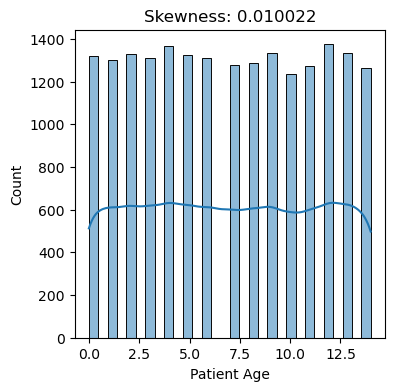

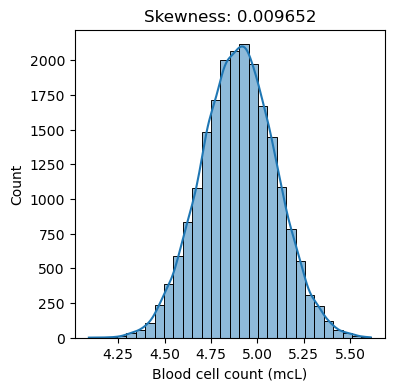

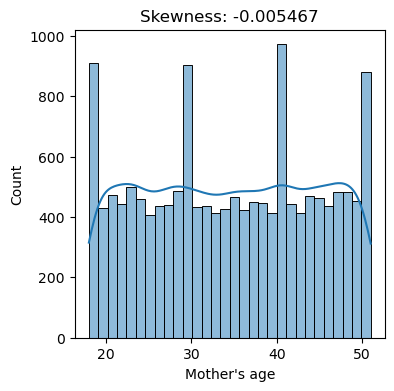

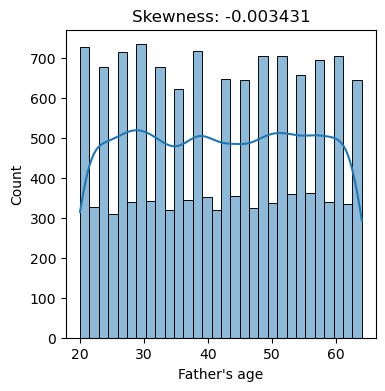

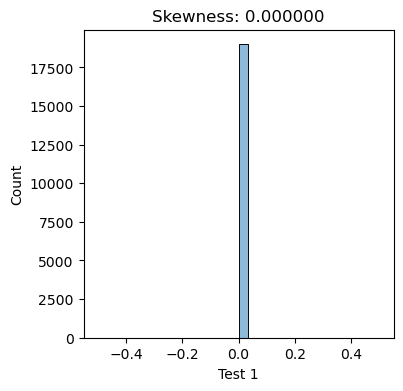

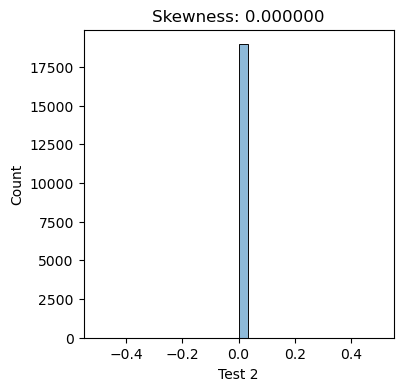

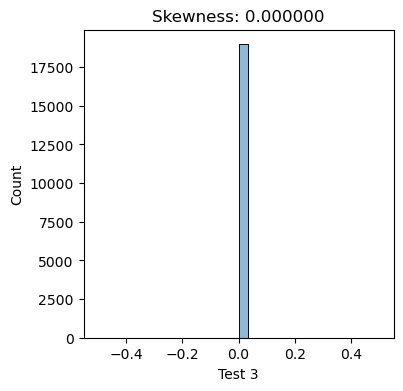

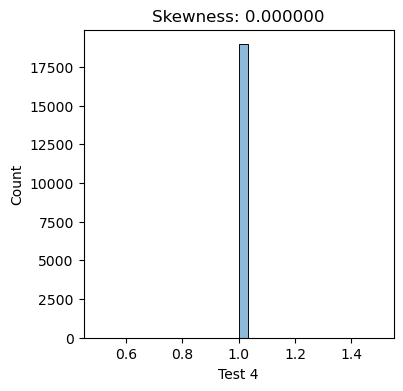

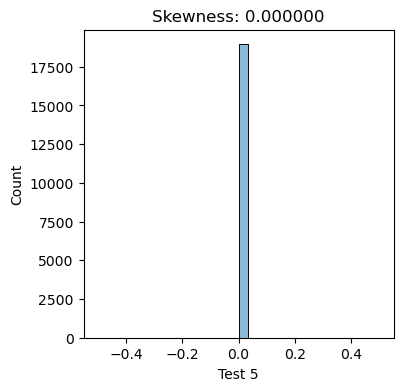

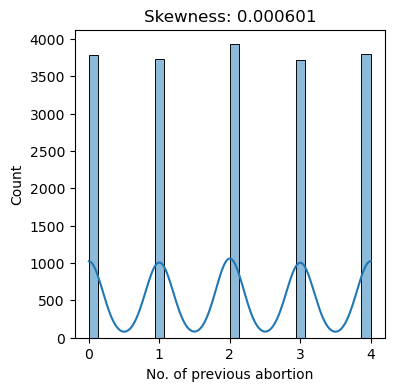

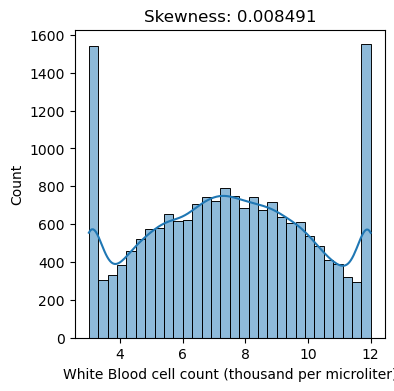

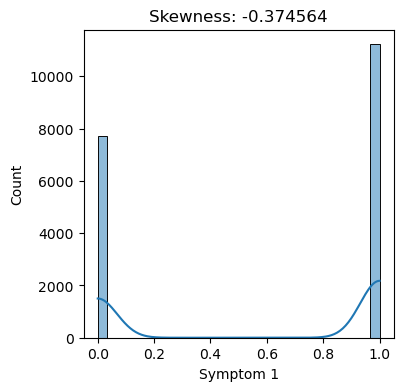

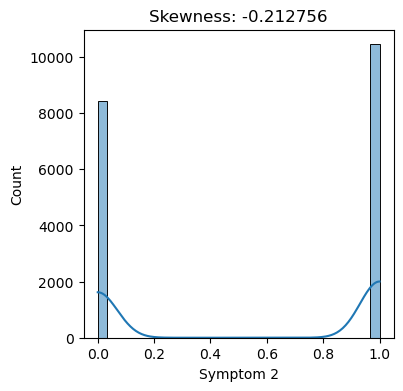

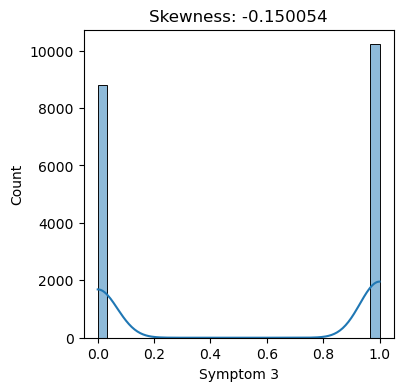

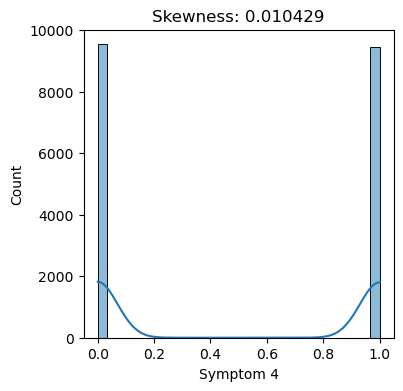

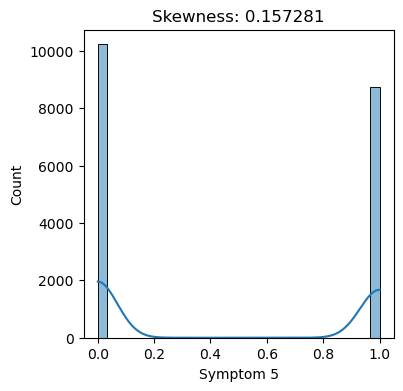

In [21]:
for col in numeric_cols:
    sk = numeric_cols[col].skew()
    plt.figure(figsize=(4,4))
    sns.histplot(data=numeric_cols, x=col, bins=30, kde=True)
    plt.title(f'Skewness: {sk:.6f}')
    plt.show();

## ii] Box plot

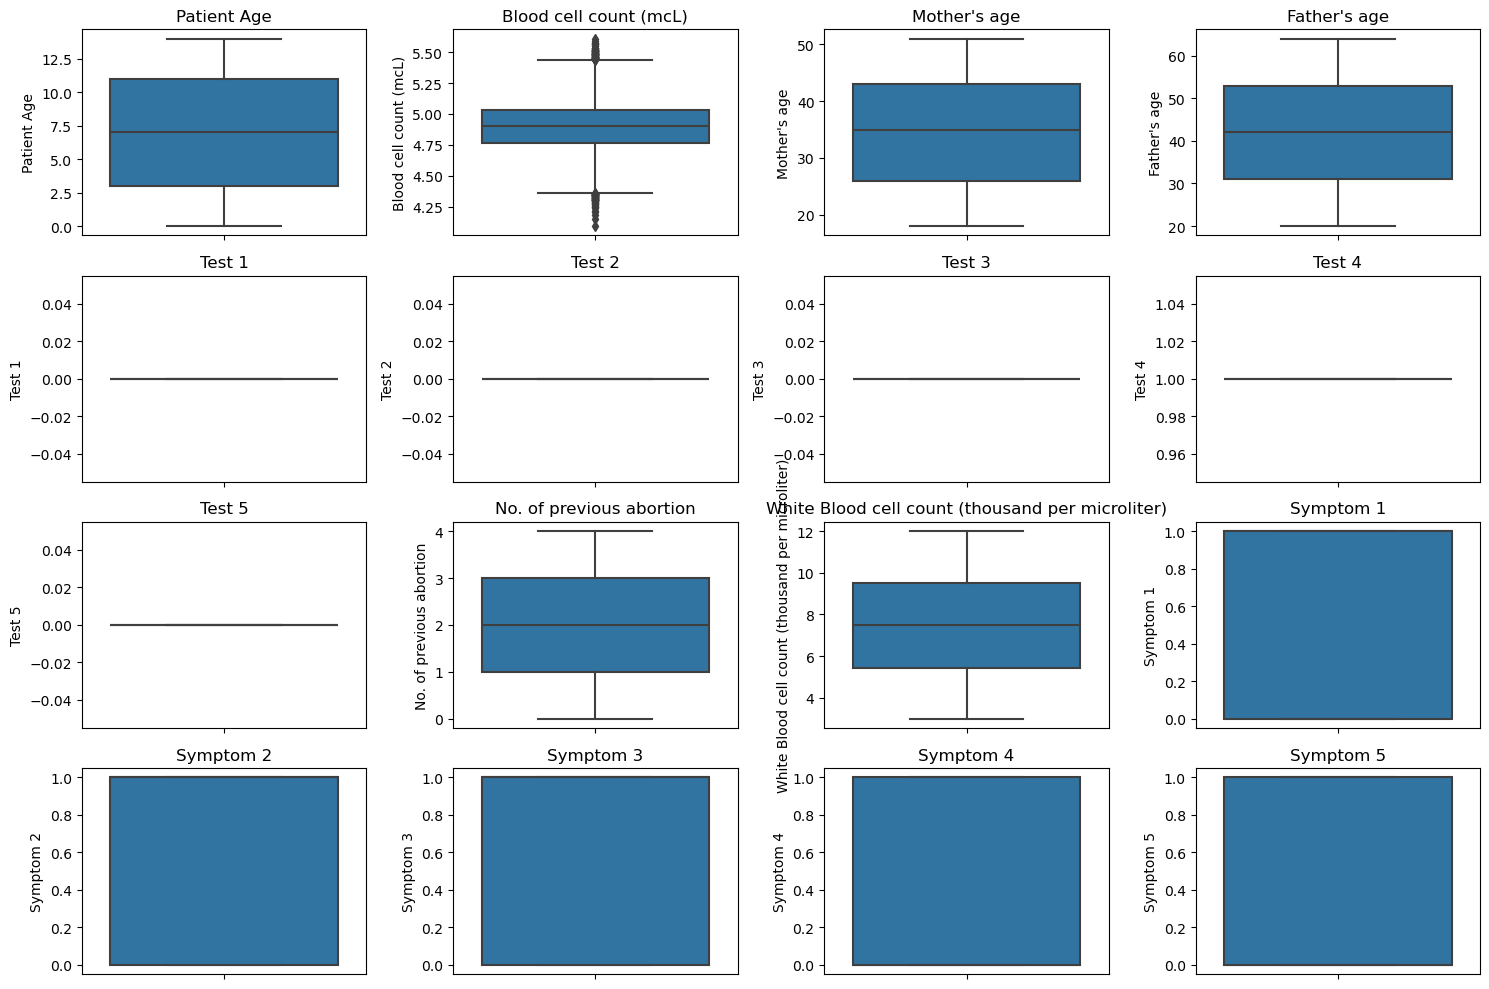

In [22]:
#box plot to identify outliers
num_cols = train_df.select_dtypes(include=np.number).columns.tolist()
# Plotting boxplots for each numeric column
plt.figure(figsize=(15, 10))
for i, column in enumerate(num_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=train_df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

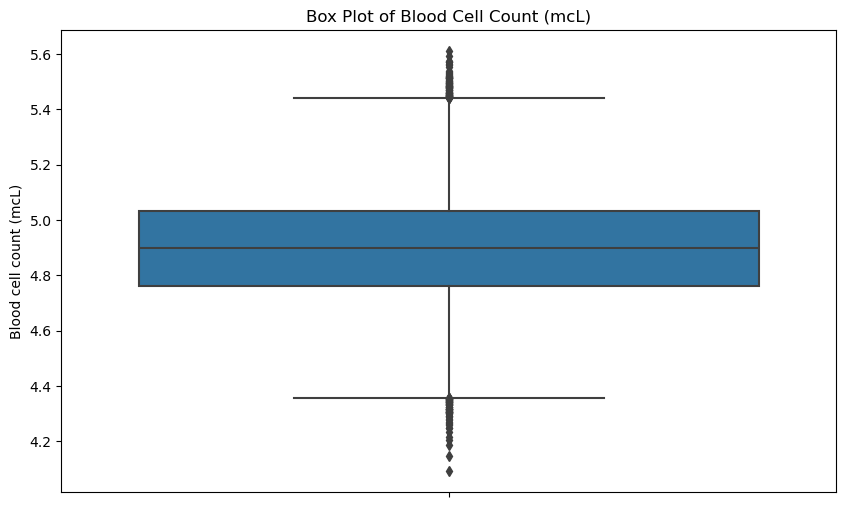

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_df['Blood cell count (mcL)'])
plt.title('Box Plot of Blood Cell Count (mcL)')
plt.ylabel('Blood cell count (mcL)')
plt.show()

# 3] DATA CLEANING AND PREPROCESSING

## a]Handling missing values

### For handling missing values deletion of rows would be inappropriate because the number of rows to be deleted is large

### i] Removing Test 1,2,3,4,5 columns 

In [11]:
column_to_drop = ['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']
train_df=train_df.drop(column_to_drop, axis=1)

### ii]Removing sympton 1,2,3,4,5

In [12]:
column_to_drop = ['Symptom 1','Symptom 2','Symptom 3','Symptom 4','Symptom 5']
train_df=train_df.drop(column_to_drop, axis=1)

In [13]:
train_df.head(2)

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0  PID0x6418          2.0                    Yes                    No   
1  PID0x25d5          4.0                    Yes                   Yes   

  Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0           Yes            No                4.760603            Richard   
1            No            No                4.910669               Mike   

  Family Name Father's name  ...  H/O radiation exposure (x-ray)  \
0         NaN         Larre  ...                              No   
1         NaN        Brycen  ...                  Not applicable   

   H/O substance abuse Assisted conception IVF/ART  \
0                   No                          No   
1       Not applicable                          No   

  History of anomalies in previous pregnancies No. of previous abortion  \
0                                          Yes                      NaN   
1                                          Yes                      NaN   

  Birth defects White Blood cell count (thousand per microliter)  \
0           NaN                                         9.857562   
1      Multiple                                         5.522560   

  Blood test result                             Genetic Disorder  \
0               NaN  Mitochondrial genetic inheritance disorders   
1            normal                                          NaN   

                     Disorder Subclass  
0  Leber's hereditary optic neuropathy  
1                      Cystic fibrosis  

[2 rows x 35 columns]

### ii] Handling missing values for Numerical features using K-nearest neighbour

In [14]:
from sklearn.impute import KNNImputer
columns_to_impute = [
    'Patient Age', "Mother's age", "Father's age",
    'No. of previous abortion'
]

In [15]:
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(train_df[columns_to_impute])
df_imputed = pd.DataFrame(imputed_data, columns=columns_to_impute)
train_df.update(df_imputed)
for column in columns_to_impute:
    train_df[column] = train_df[column].astype(int)

In [17]:
col_to_impute = ['White Blood cell count (thousand per microliter)']
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(train_df[col_to_impute])
df_imputed = pd.DataFrame(imputed_data, columns=col_to_impute)
train_df.update(df_imputed)

### ii] Handling missing values for Categorical features using MODE as its best suited method for categorical features

In [18]:
# List of categorical columns 
categorical_columns = [
    'Patient Id', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 
    'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute', 'Status', 
    'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 
    'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 
    'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
    'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 
    'Birth defects', 'Blood test result', 'Genetic Disorder', 'Disorder Subclass'
]

# Fill missing values with the mode for each categorical column
for column in categorical_columns:
    if column in train_df.columns:
        train_df[column].fillna(train_df[column].mode()[0], inplace=True)

In [19]:
train_df.isnull().sum()

Patient Id                                          0
Patient Age                                         0
Genes in mother's side                              0
Inherited from father                               0
Maternal gene                                       0
Paternal gene                                       0
Blood cell count (mcL)                              0
Patient First Name                                  0
Family Name                                         0
Father's name                                       0
Mother's age                                        0
Father's age                                        0
Institute Name                                      0
Location of Institute                               0
Status                                              0
Respiratory Rate (breaths/min)                      0
Heart Rate (rates/min                               0
Parental consent                                    0
Follow-up                   

In [20]:
for column in train_df.columns:
    unique_values = train_df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")
    print("\n")

Unique values in 'Patient Id': ['PID0x6418' 'PID0x25d5' 'PID0x4a82' ... 'PID0x15' 'PID0x8d32' 'PID0x883d']


Unique values in 'Patient Age': [ 2  4  6 12 11 14  3  7  1  0  5 10 13  8  9]


Unique values in 'Genes in mother's side': ['Yes' 'No']


Unique values in 'Inherited from father': ['No' 'Yes']


Unique values in 'Maternal gene': ['Yes' 'No']


Unique values in 'Paternal gene': ['No' 'Yes']


Unique values in 'Blood cell count (mcL)': [4.76060309 4.91066906 4.89329743 ... 5.08483063 5.22482777 5.13794212]


Unique values in 'Patient First Name': ['Richard' 'Mike' 'Kimberly' ... 'Queen' 'Aurelio' 'Earnestine']


Unique values in 'Family Name': ['Smith' 'Hoelscher' 'Stutzman' ... 'Kwok' 'Brumback' 'Frascone']


Unique values in 'Father's name': ['Larre' 'Brycen' 'Nashon' ... 'Trayvion' 'Shivaan' 'Dyer']


Unique values in 'Mother's age': [37 39 41 21 32 26 40 45 44 28 36 50 30 24 22 27 33 31 51 23 49 46 18 38
 42 48 25 19 47 34 35 20 29 43]


Unique values in 'Father's age': [42 2

### Loading data once again to verify removed null values

In [21]:
train_df

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418            2                    Yes                    No   
1      PID0x25d5            4                    Yes                   Yes   
2      PID0x4a82            6                    Yes                    No   
3      PID0x4ac8           12                    Yes                    No   
4      PID0x1bf7           11                    Yes                    No   
...          ...          ...                    ...                   ...   
21006   PID0x26c           11                     No                   Yes   
21007   PID0xa01            7                     No                    No   
21008    PID0x15            5                    Yes                    No   
21009  PID0x8d32            1                    Yes                    No   
21010  PID0x883d           13                     No                   Yes   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0               Yes            No                4.760603            Richard   
1                No            No                4.910669               Mike   
2                No            No                4.893297           Kimberly   
3               Yes            No                4.705280            Jeffery   
4               Yes           Yes                4.720703            Johanna   
...             ...           ...                     ...                ...   
21006           Yes            No                5.090495              Betty   
21007            No           Yes                5.214750               Beth   
21008           Yes           Yes                5.084831              Craig   
21009            No           Yes                5.224828          Francisco   
21010           Yes            No                5.137942              Byron   

      Family Name Father's name  ...  H/O radiation exposure (x-ray)  \
0           Smith         Larre  ...                              No   
1           Smith        Brycen  ...                  Not applicable   
2           Smith        Nashon  ...                             Yes   
3       Hoelscher        Aayaan  ...                               -   
4        Stutzman         Suave  ...                               -   
...           ...           ...  ...                             ...   
21006       Smith        Letwan  ...                              No   
21007       Smith      Trayvion  ...                  Not applicable   
21008    Frascone       Shivaan  ...                              No   
21009        Owen          Dyer  ...                              No   
21010     Keating         Owens  ...                               -   

       H/O substance abuse Assisted conception IVF/ART  \
0                       No                          No   
1           Not applicable                          No   
2                        -                         Yes   
3           Not applicable                         Yes   
4           Not applicable                         Yes   
...                    ...                         ...   
21006       Not applicable                          No   
21007                   No                         Yes   
21008       Not applicable                          No   
21009                    -                         Yes   
21010                  Yes                         Yes   

      History of anomalies in previous pregnancies No. of previous abortion  \
0                                              Yes                        1   
1                                              Yes                        0   
2                                              Yes                        4   
3                                              Yes                        1   
4                                               No                        4   
...                                            ...                      

# b] Removing or Transforming outliers

### As seen under Visualizing variable distribution BOX PLOT there is one numerical feature with outliers ,Hence need to treat it

In [22]:
def find_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    outliers = find_outliers(train_df[column])
    train_df =train_df[~train_df.index.isin(outliers.index)]

In [23]:
train_df.shape

(20871, 35)

### The box plot shows the verification of removal of outliers

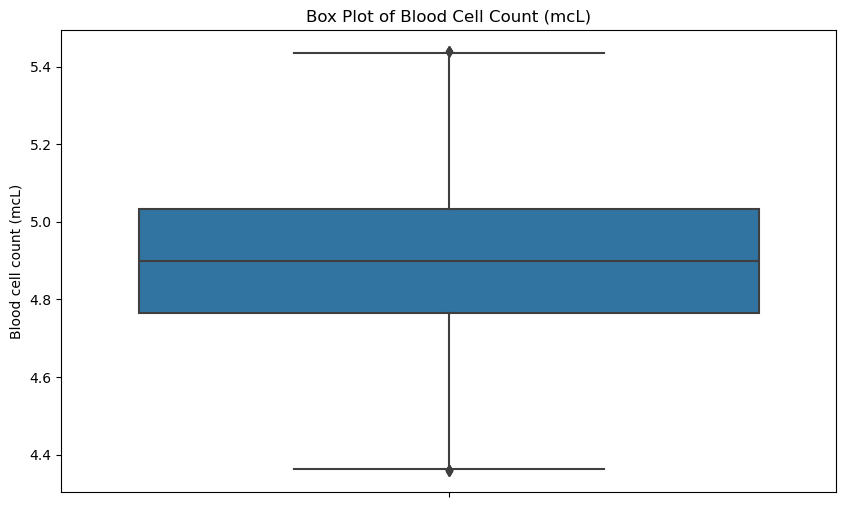

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=train_df['Blood cell count (mcL)'])
plt.title('Box Plot of Blood Cell Count (mcL)')
plt.ylabel('Blood cell count (mcL)')
plt.show()

# C]Encoding categorical variables

In [24]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer

en = preprocessing.LabelEncoder()

train_df['Genetic Disorder Encoded'] =en.fit_transform(train_df['Genetic Disorder'])
train_df['Disorder Subclass Encoded'] =en.fit_transform(train_df['Disorder Subclass'])

train_df['Status Encoded'] =en.fit_transform(train_df['Status'])
train_df['Respiratory Rate (breaths/min) Encoded'] =en.fit_transform(train_df['Respiratory Rate (breaths/min)'])
train_df['Heart Rate (rates/min Encoded'] =en.fit_transform(train_df['Heart Rate (rates/min'])
train_df['Birth defects Encoded'] =en.fit_transform(train_df['Birth defects'])
train_df['Blood test result Encoded'] =en.fit_transform(train_df['Blood test result'])

In [25]:
train_df

Patient Id  Patient Age Genes in mother's side Inherited from father  \
0      PID0x6418            2                    Yes                    No   
1      PID0x25d5            4                    Yes                   Yes   
2      PID0x4a82            6                    Yes                    No   
3      PID0x4ac8           12                    Yes                    No   
4      PID0x1bf7           11                    Yes                    No   
...          ...          ...                    ...                   ...   
21006   PID0x26c           11                     No                   Yes   
21007   PID0xa01            7                     No                    No   
21008    PID0x15            5                    Yes                    No   
21009  PID0x8d32            1                    Yes                    No   
21010  PID0x883d           13                     No                   Yes   

      Maternal gene Paternal gene  Blood cell count (mcL) Patient First Name  \
0               Yes            No                4.760603            Richard   
1                No            No                4.910669               Mike   
2                No            No                4.893297           Kimberly   
3               Yes            No                4.705280            Jeffery   
4               Yes           Yes                4.720703            Johanna   
...             ...           ...                     ...                ...   
21006           Yes            No                5.090495              Betty   
21007            No           Yes                5.214750               Beth   
21008           Yes           Yes                5.084831              Craig   
21009            No           Yes                5.224828          Francisco   
21010           Yes            No                5.137942              Byron   

      Family Name Father's name  ...  Assisted conception IVF/ART  \
0           Smith         Larre  ...                           No   
1           Smith        Brycen  ...                           No   
2           Smith        Nashon  ...                          Yes   
3       Hoelscher        Aayaan  ...                          Yes   
4        Stutzman         Suave  ...                          Yes   
...           ...           ...  ...                          ...   
21006       Smith        Letwan  ...                           No   
21007       Smith      Trayvion  ...                          Yes   
21008    Frascone       Shivaan  ...                           No   
21009        Owen          Dyer  ...                          Yes   
21010     Keating         Owens  ...                          Yes   

       History of anomalies in previous pregnancies No. of previous abortion  \
0                                               Yes                        1   
1                                               Yes                        0   
2                                               Yes                        4   
3                                               Yes                        1   
4                                                No                        4   
...                                             ...                      ...   
21006                                           Yes                        1   
21007                                           Yes                        3   
21008                                            No                        0   
21009                                           Yes                        1   
21010                                            No                        1   

      Birth defects White Blood cell count (thousand per microliter)  \
0          Singular                                         9.857562   
1          Multiple                                         5.522560   
2          Singular                                         7.484680   
3          Singular           

In [26]:
cat_col = [col for col in train_df.columns if train_df[col].dtype == 'object']
print('Categorical columns :',cat_col)
print()
# Numerical columns
num_col = [col for col in train_df.columns if train_df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Patient Id', "Genes in mother's side", 'Inherited from father', 'Maternal gene', 'Paternal gene', 'Patient First Name', 'Family Name', "Father's name", 'Institute Name', 'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia', 'Autopsy shows birth defect (if applicable)', 'Place of birth', 'Folic acid details (peri-conceptional)', 'H/O serious maternal illness', 'H/O radiation exposure (x-ray)', 'H/O substance abuse', 'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 'Birth defects', 'Blood test result', 'Genetic Disorder', 'Disorder Subclass']

Numerical columns : ['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)', 'Genetic Disorder Encoded', 'Disorder Subclass Encoded']


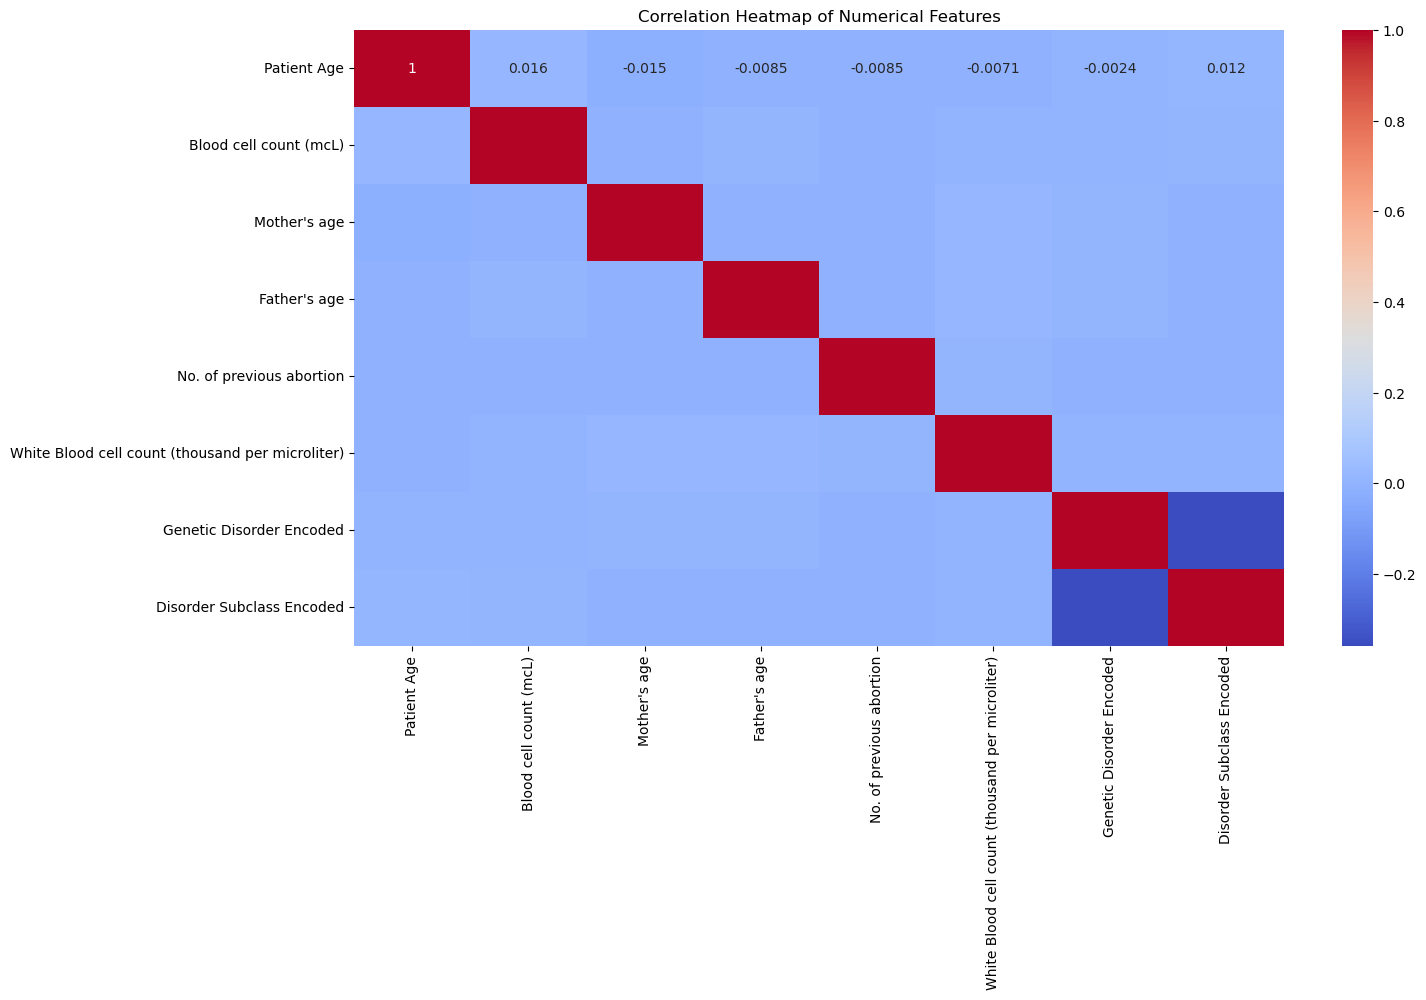

In [40]:
selected_cols = ['Patient Age', 'Blood cell count (mcL)', "Mother's age", "Father's age",'No. of previous abortion',
       'White Blood cell count (thousand per microliter)','Genetic Disorder Encoded', 'Disorder Subclass Encoded']

#correlation with heatmap to interpert the relation & multicolliniarity
s=train_df[selected_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(s, annot=True , cmap = 'coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 4] DIFFERENT TYPES OF ANALYSIS AND VISUALIZATION

## a] Univariate Analysis

## i] Target variable frequency

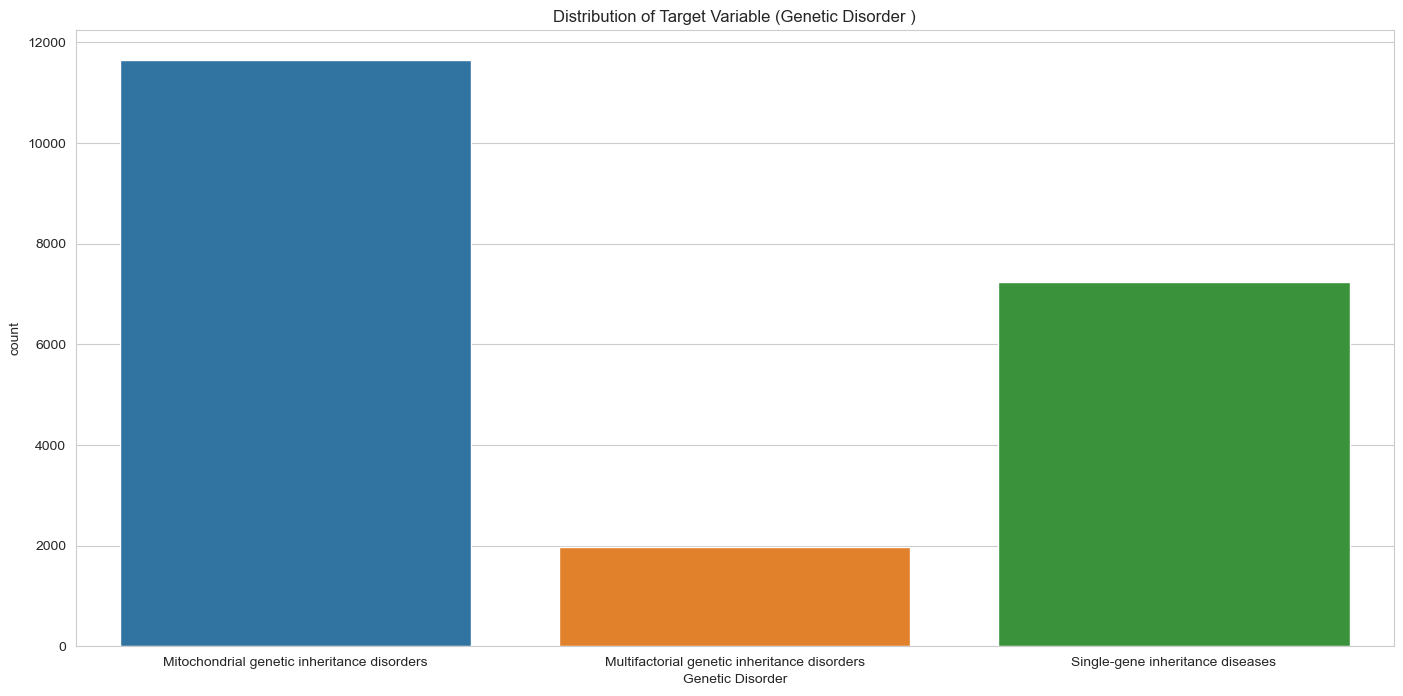

In [41]:
# Set the style of all graphs to seaborn
sns.set_style("whitegrid")

# Plot the target variable 'stroke'
plt.figure(figsize=(17,8 ))
sns.countplot(x=train_df['Genetic Disorder'])
plt.title('Distribution of Target Variable (Genetic Disorder )')
plt.show()

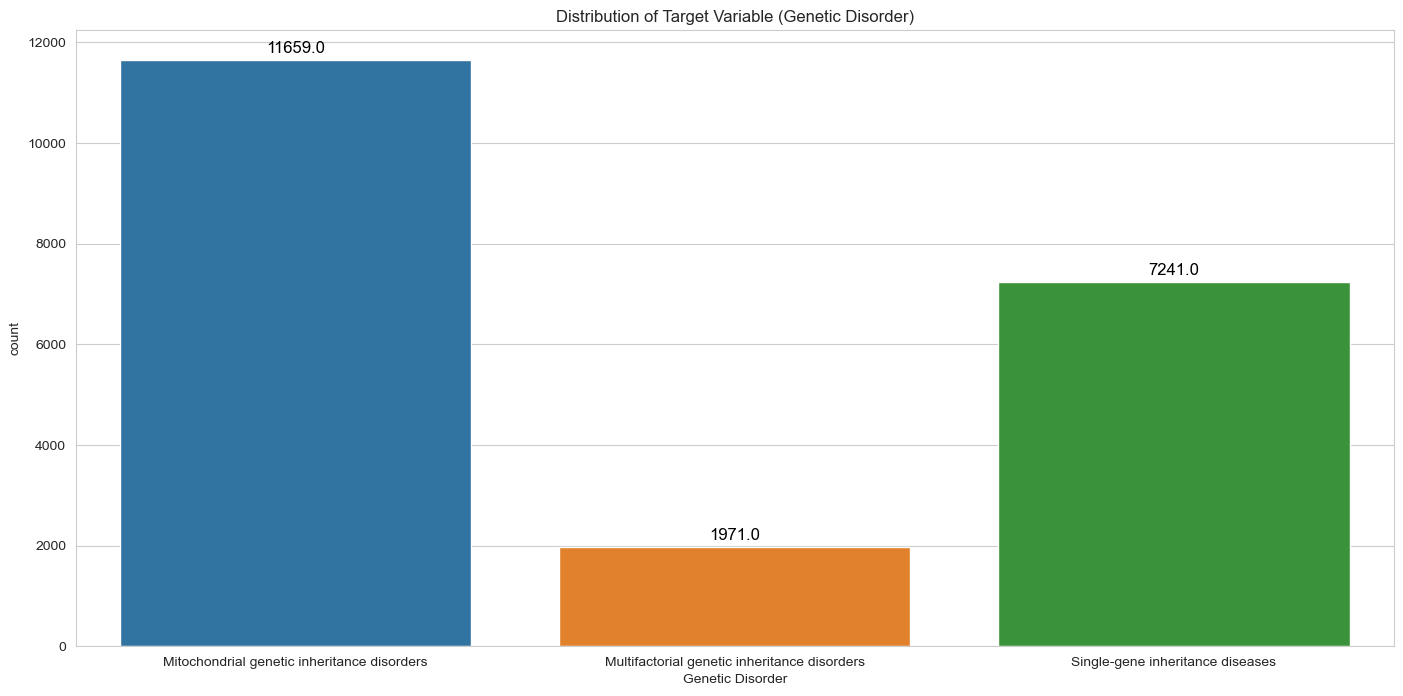

In [42]:
sns.set_style("whitegrid")
plt.figure(figsize=(17, 8))
ax = sns.countplot(x=train_df['Genetic Disorder'])
plt.title('Distribution of Target Variable (Genetic Disorder)')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## ii] Univariate analysis of Categorical Features

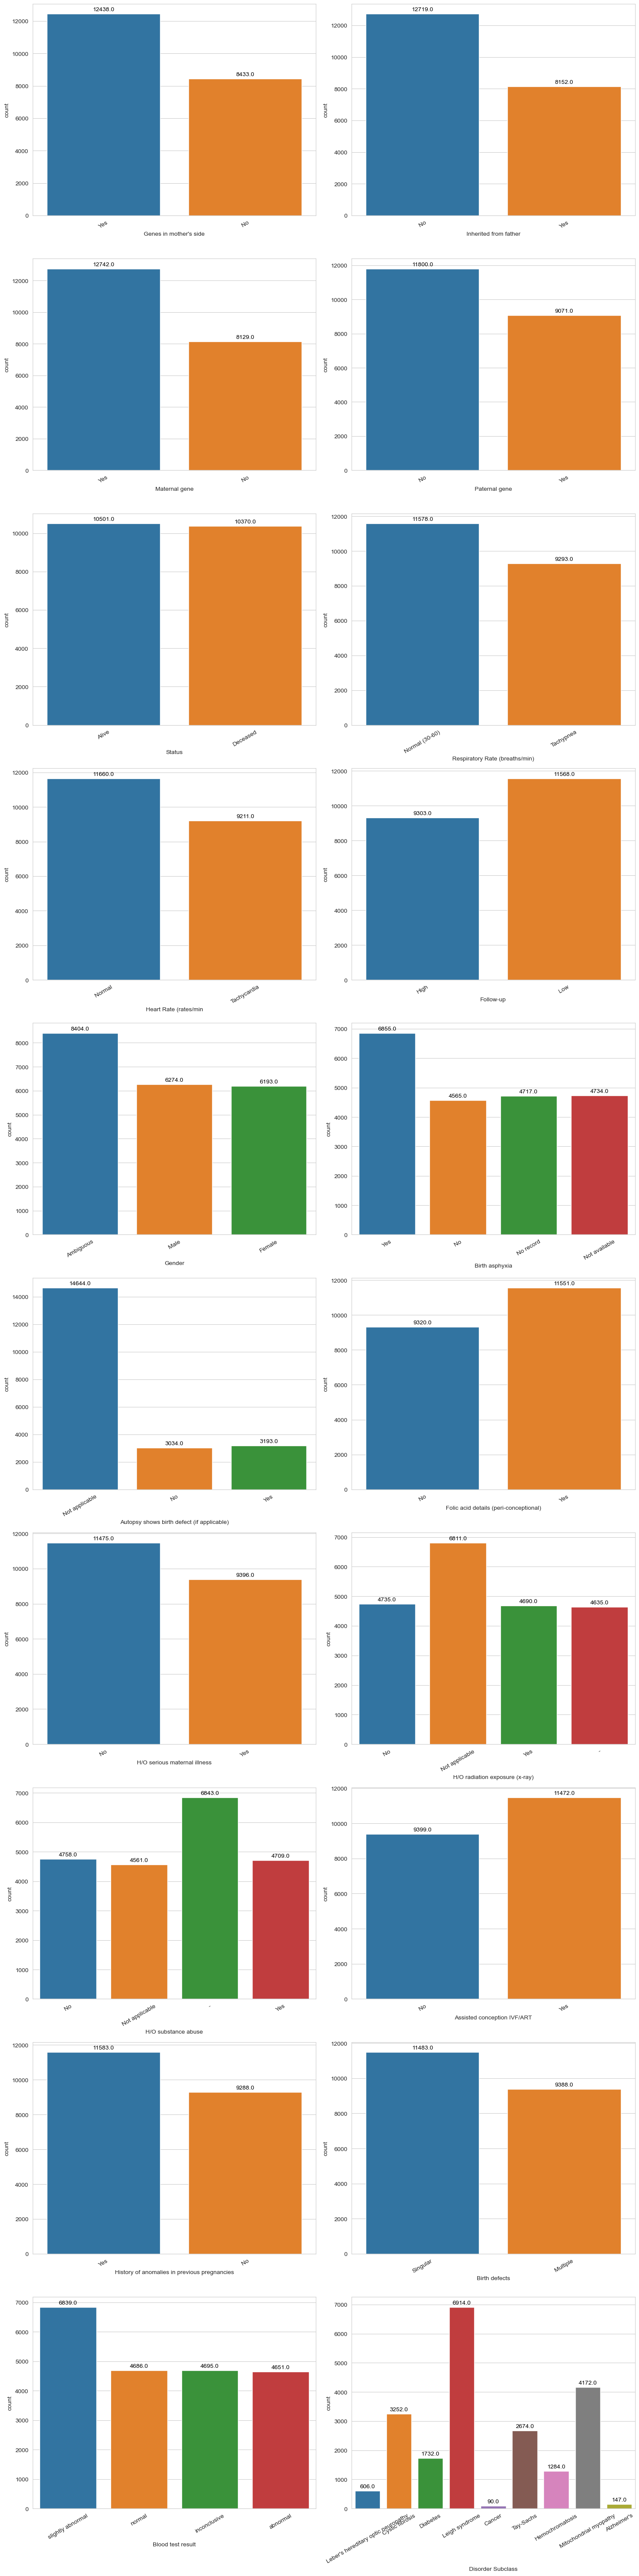

In [43]:
categorical_variables = [ "Genes in mother's side", 'Inherited from father',
                         'Maternal gene', 'Paternal gene','Status', 
                         'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 
                          'Follow-up','Gender', 'Birth asphyxia', 
                         'Autopsy shows birth defect (if applicable)', 
                         'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
                         'H/O radiation exposure (x-ray)', 'H/O substance abuse', 
                         'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 
                         'Birth defects', 'Blood test result','Disorder Subclass']

fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(15, 60))

for var, subplot in zip(categorical_variables, axs.flatten()):
    ax = sns.countplot(x=var, data=train_df, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(30)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

## ii] Univariate analysis of Numerical Features

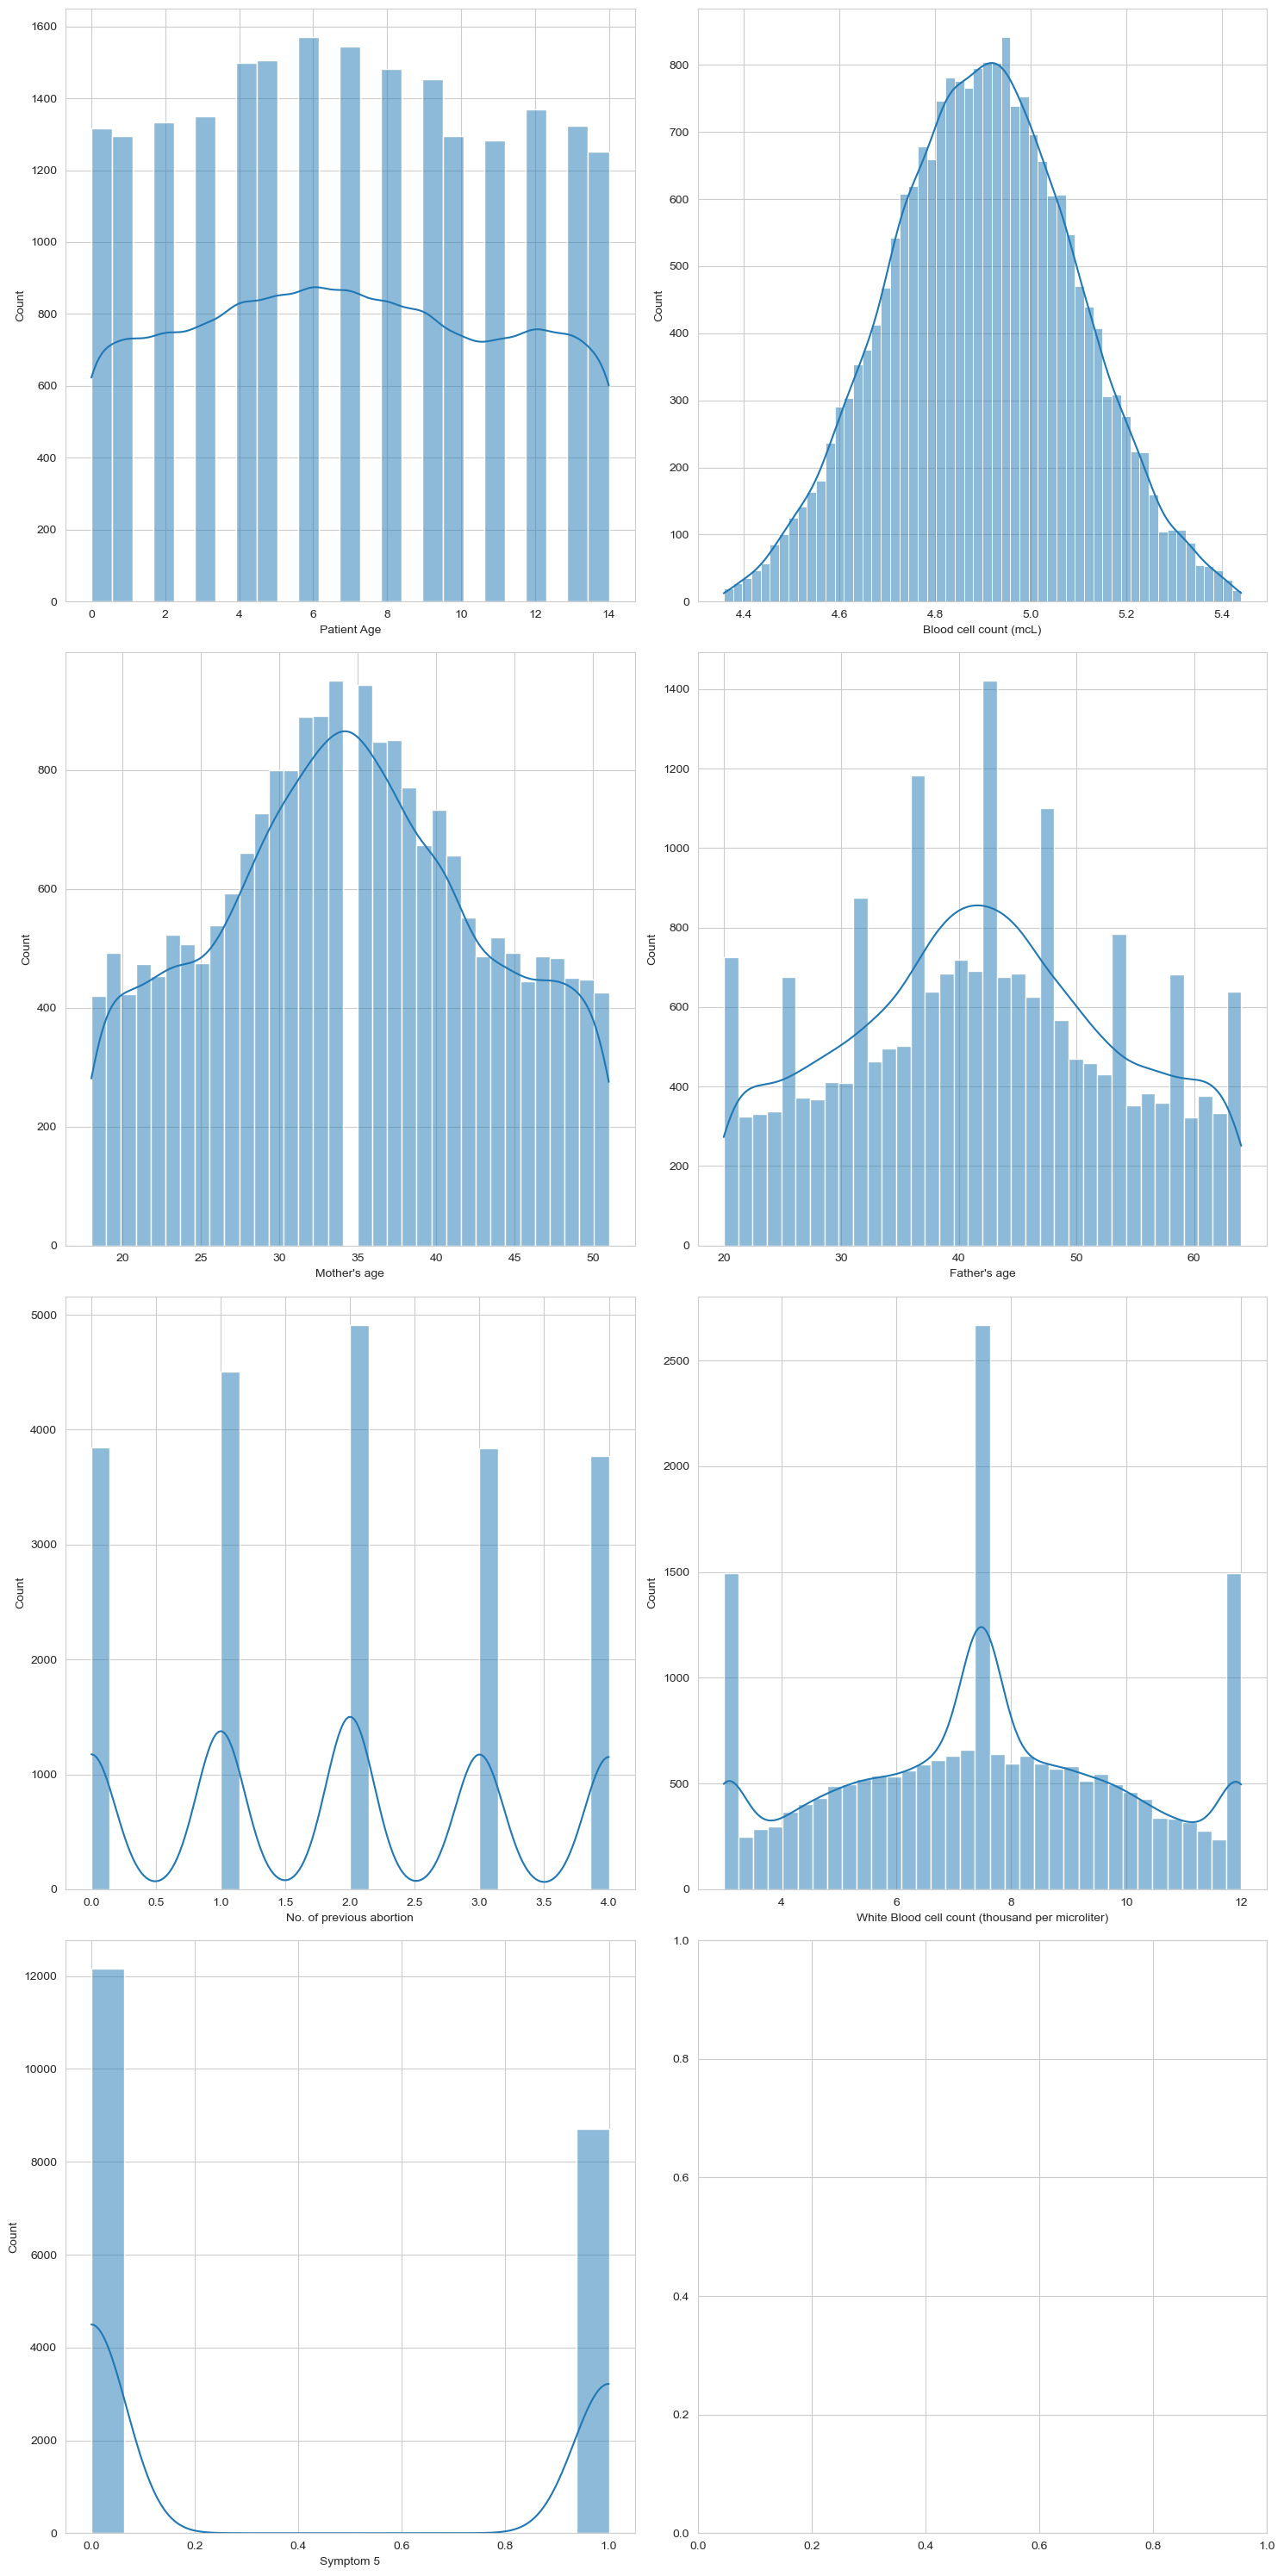

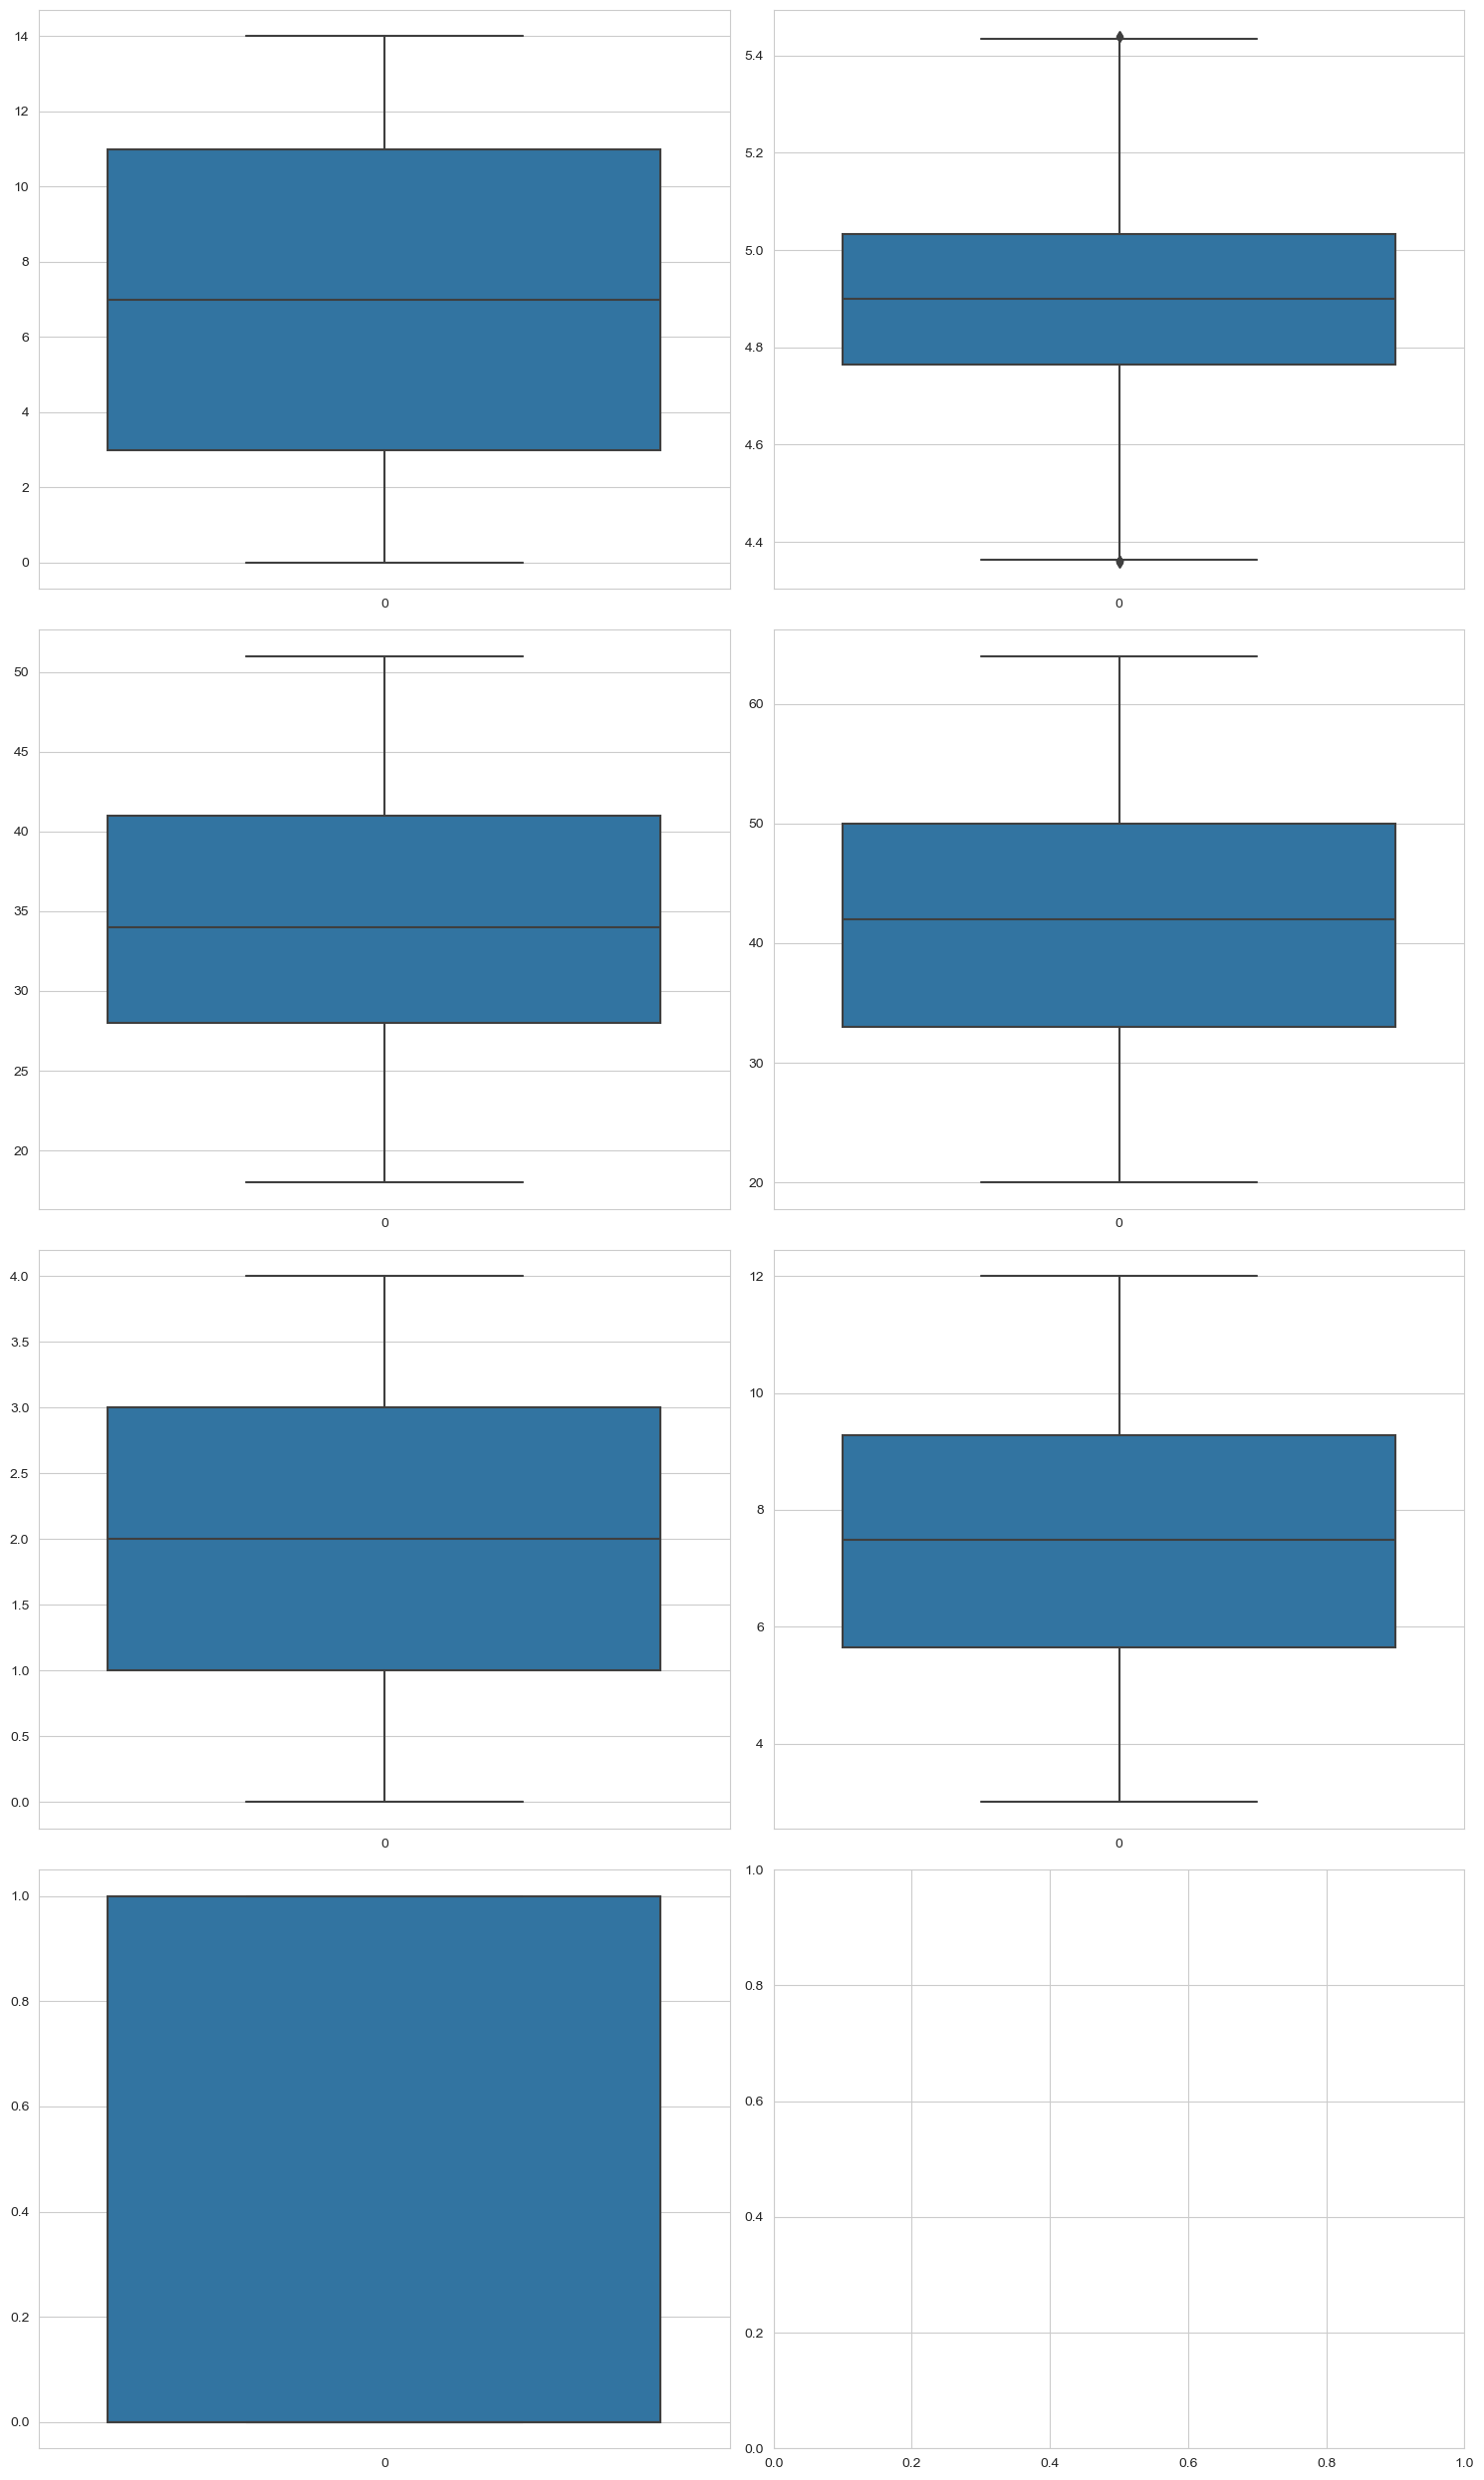

In [129]:
# List of continuous variables
continuous_variables = ['Patient Age', 'Blood cell count (mcL)', "Mother's age", 
                         "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)',
                         'Symptom 5']

# Plot the histograms for continuous variables
fig, axs = plt.subplots(4, 2, figsize=(15, 30))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.histplot(train_df[var], kde=True, ax=subplot)

plt.tight_layout()
plt.show()

# Plot the boxplots for continuous variables
fig, axs = plt.subplots(4, 2, figsize=(15, 25))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.boxplot(train_df[var], ax=subplot)

plt.tight_layout()
plt.show()

# b] Bivariate Analysis

### i]For the categorical variables, we'll use count plots split by the target variable Genetic Disorder

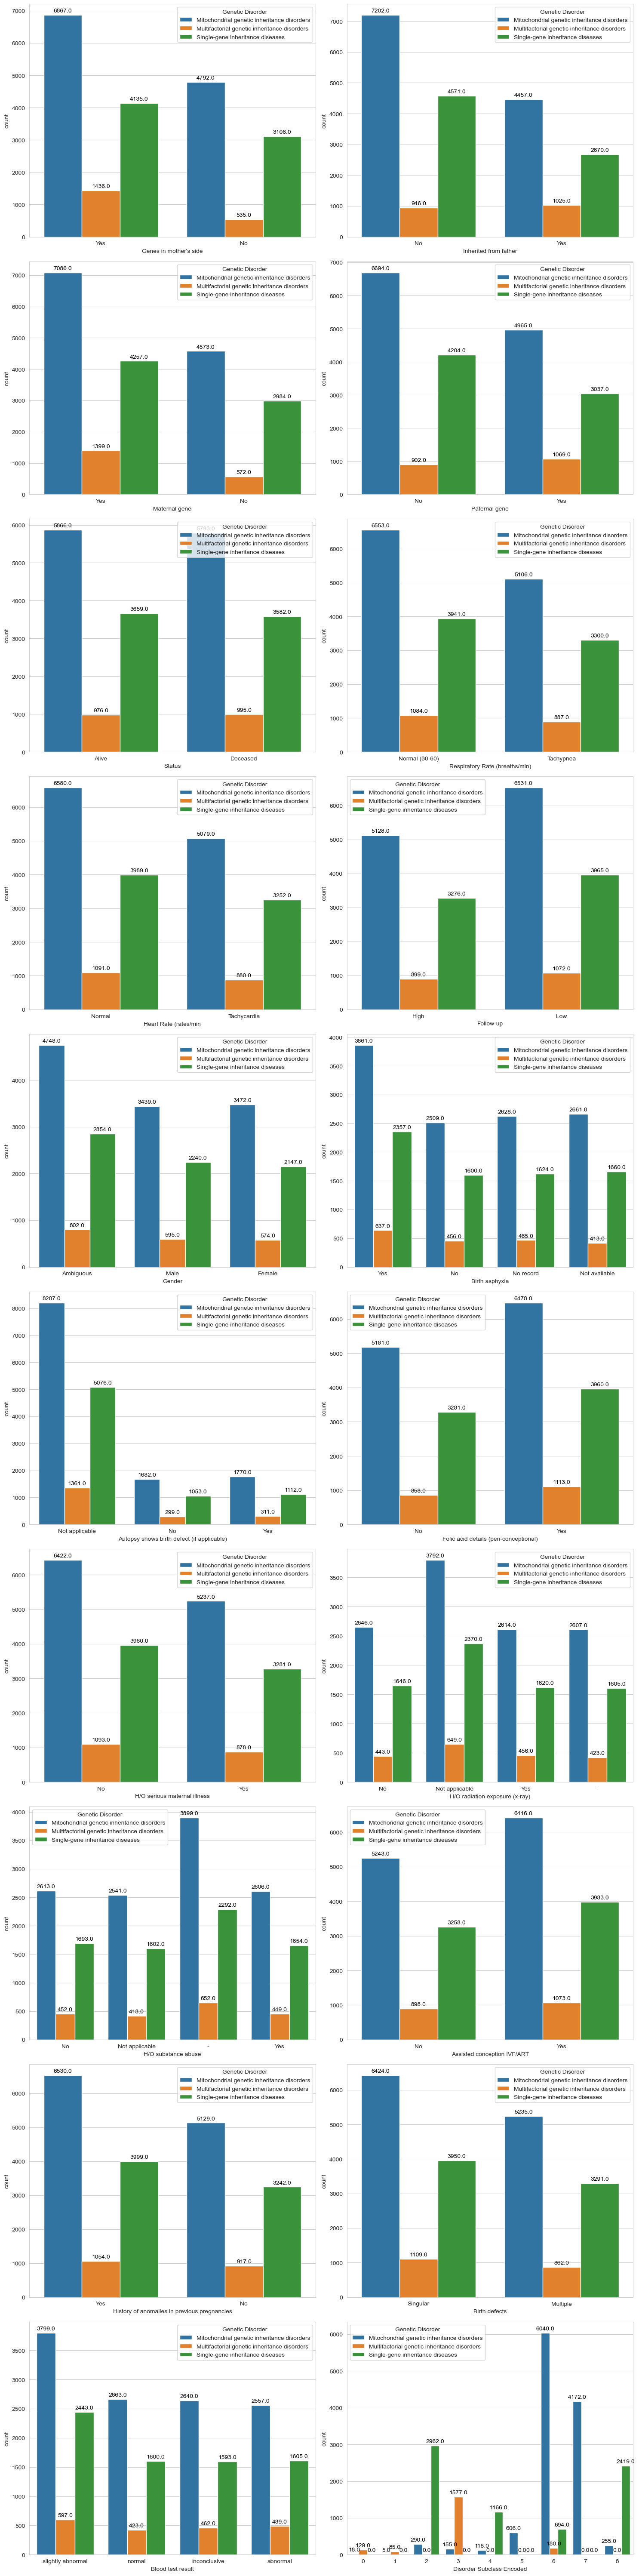

In [130]:
# Manually define the list of selected categorical columns
categorical_variables = [ "Genes in mother's side", 'Inherited from father',
                         'Maternal gene', 'Paternal gene','Status', 
                         'Respiratory Rate (breaths/min)', 'Heart Rate (rates/min', 
                          'Follow-up','Gender', 'Birth asphyxia', 
                         'Autopsy shows birth defect (if applicable)', 
                         'Folic acid details (peri-conceptional)', 'H/O serious maternal illness',
                         'H/O radiation exposure (x-ray)', 'H/O substance abuse', 
                         'Assisted conception IVF/ART', 'History of anomalies in previous pregnancies', 
                         'Birth defects', 'Blood test result','Disorder Subclass Encoded']

# Create subplots
fig, axs = plt.subplots(10, 2, figsize=(15, 60))

for var, subplot in zip(categorical_variables, axs.flatten()[:len(categorical_variables)]):
    ax = sns.countplot(x=train_df[var], hue=train_df['Genetic Disorder'], ax=subplot)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

## ii] For the continuous variables, were using violin plots split by the target variable.

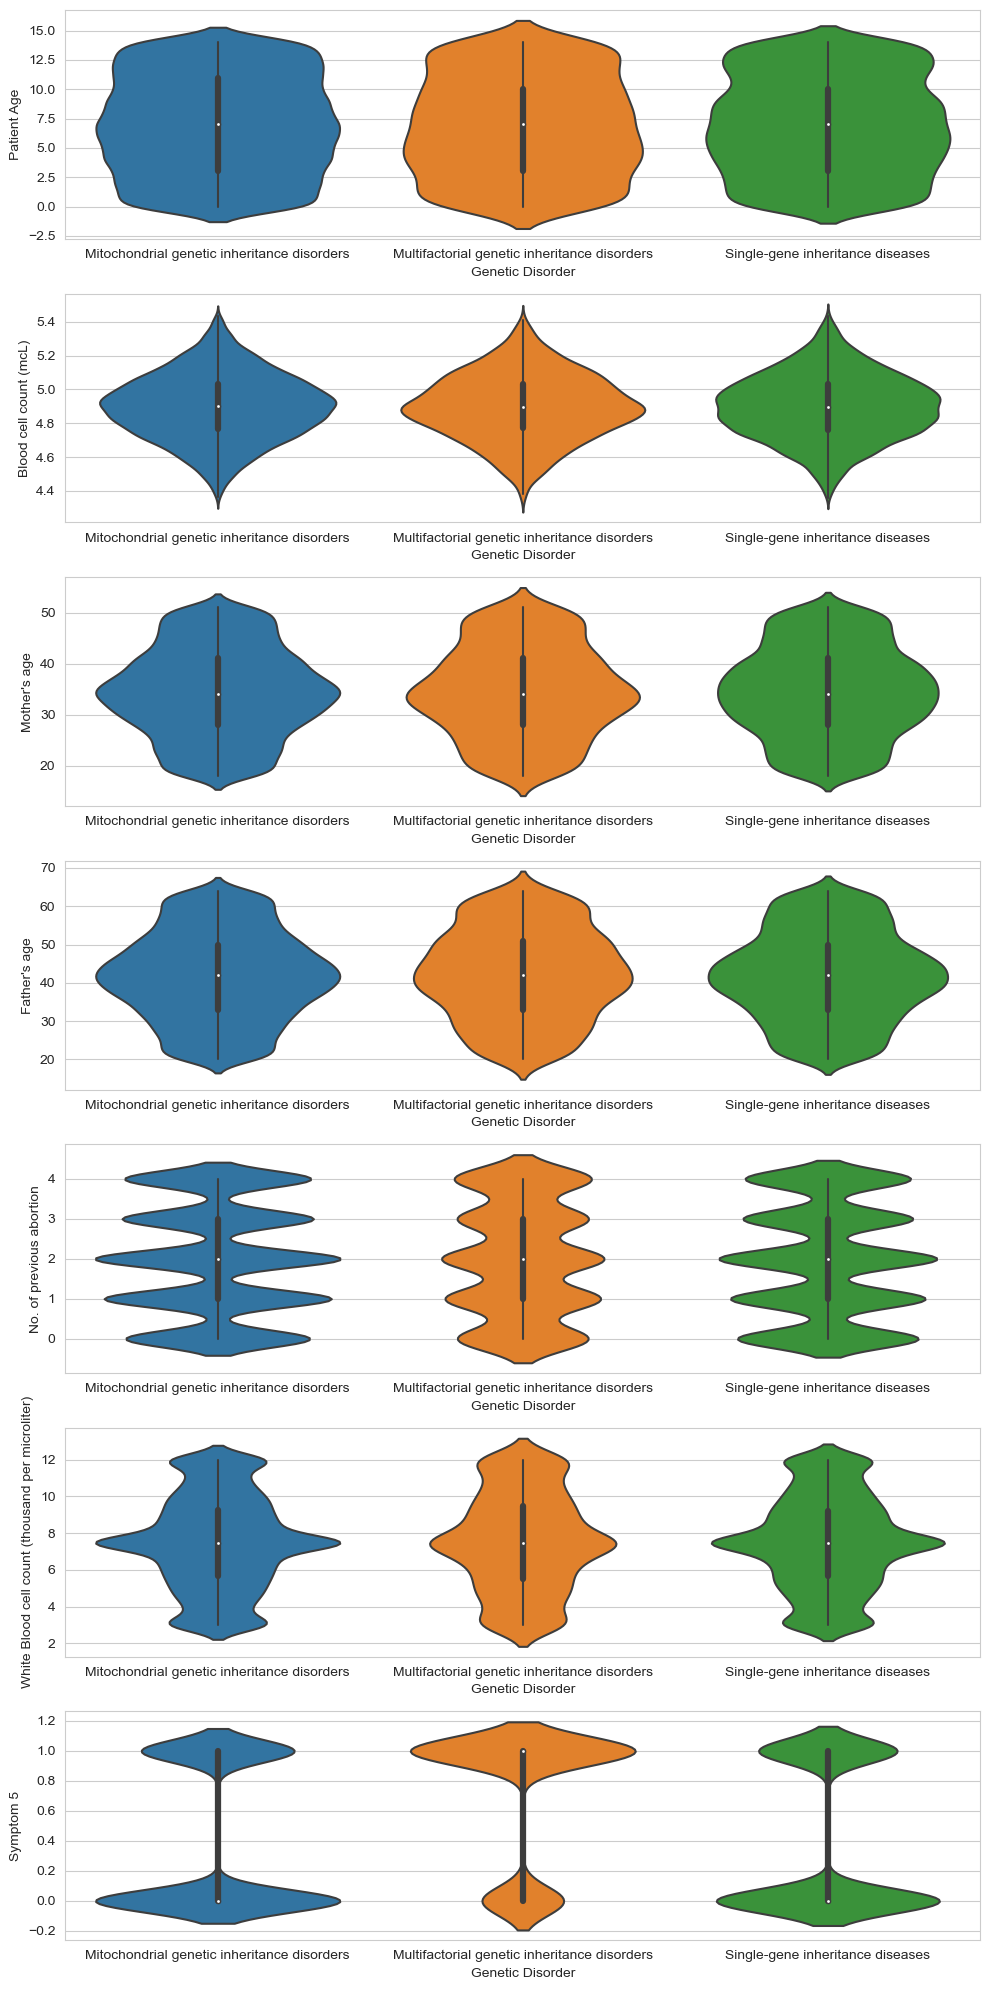

In [131]:
# Manually define the list of selected Numerical columns
continuous_variables = [ 'Patient Age', 'Blood cell count (mcL)', "Mother's age", 
                         "Father's age", 'No. of previous abortion', 'White Blood cell count (thousand per microliter)',
                         'Symptom 5']


# Plot the continuous variables against the target variable 'stroke'
fig, axs = plt.subplots(7, 1, figsize=(10, 20))

for var, subplot in zip(continuous_variables, axs.flatten()):
    sns.violinplot(x=train_df['Genetic Disorder'], y=train_df[var], ax=subplot)

plt.tight_layout()
plt.show()

# Hypothesis

# Univariate Hypothesis

## 1] Which gender is more affectic with Genetic Disorder?

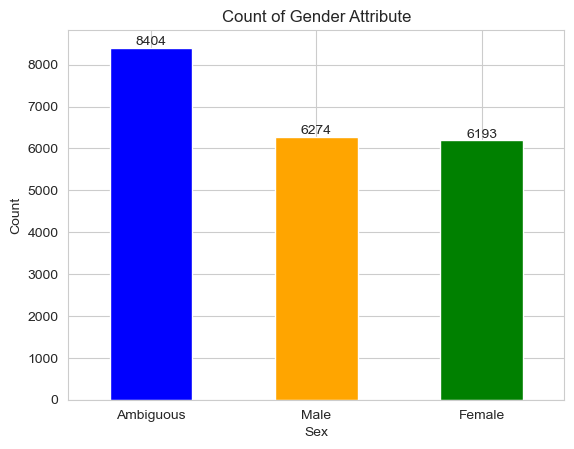

<Figure size 1x1 with 0 Axes>

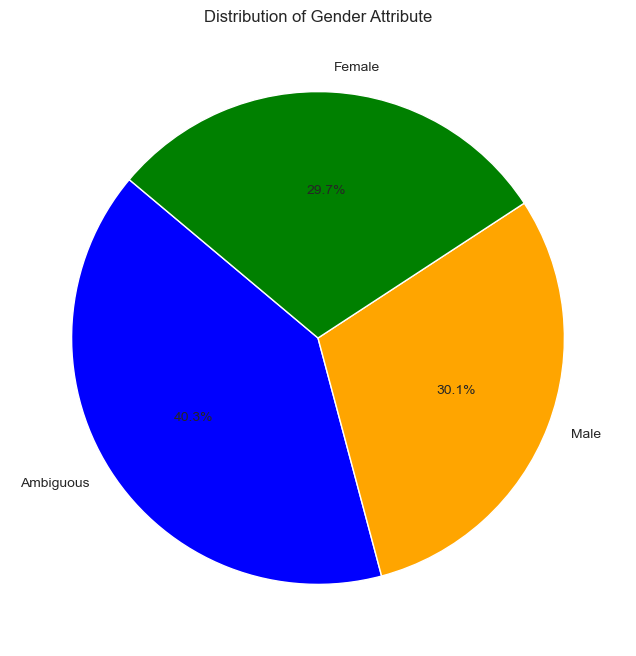

In [44]:
sex_counts = train_df['Gender'].value_counts()
ax = sex_counts.plot(kind='bar', color=['blue', 'orange','green'])
for i, count in enumerate(sex_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')   
plt.title('Count of Gender Attribute')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.figure(figsize=(0.01,0.01))
plt.show()

plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green'], startangle=140)
plt.title('Distribution of Gender Attribute')
plt.ylabel('')  # Hide the y-label
plt.show()

## Inference : We can see that Genetic Disorders are seen almost equally in Both Male and Female

## 2] How number of Previous abortion causing the reason for Genetic Disorder?

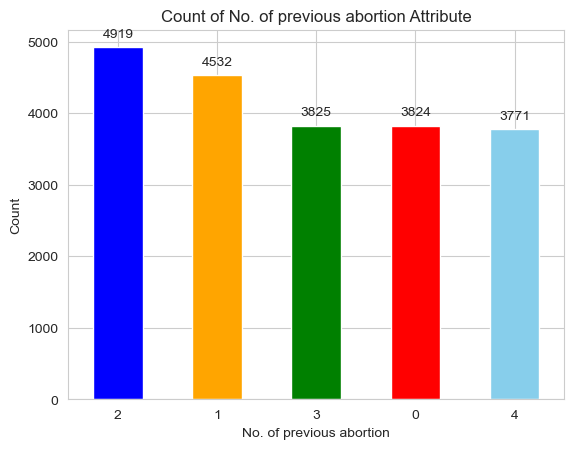

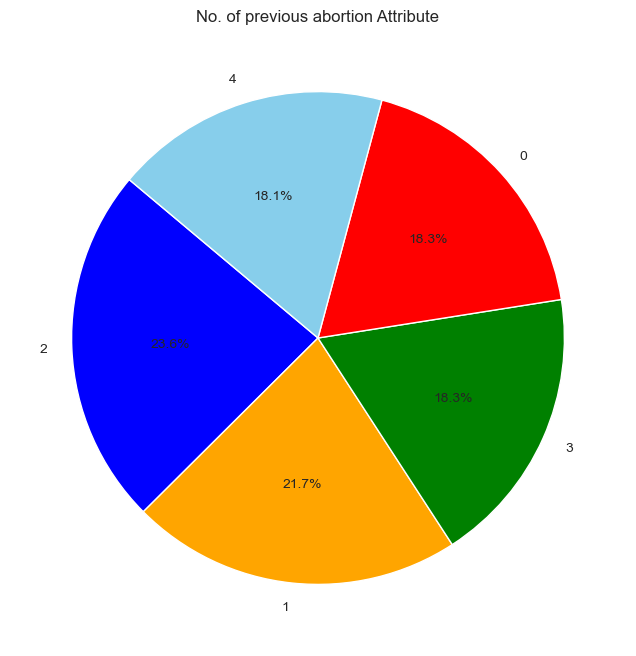

In [45]:
npa= train_df['No. of previous abortion'].value_counts()
ax = npa.plot(kind='bar', color=['blue', 'orange', 'green', 'red', 'skyblue'])

# Annotate the bars with the counts
for i, count in enumerate(npa):
    ax.text(i, count + 100, str(count), ha='center', va='bottom')  # Adjust the value 100 for better positioning if needed

# Set the title and labels
plt.title('Count of No. of previous abortion Attribute')
plt.xlabel('No. of previous abortion')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Show the plot
plt.show()


plt.figure(figsize=(8, 8))
npa.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red', 'skyblue'], startangle=140)
plt.title('No. of previous abortion Attribute')
plt.ylabel('')  # Hide the y-label
plt.show()

## Inference : The frequency of Number of previous abortion two is high ,which states that the disorder is likely more for this and for one.

## 3]Which is the dominating Genetic disorder among all? or  what is the order?

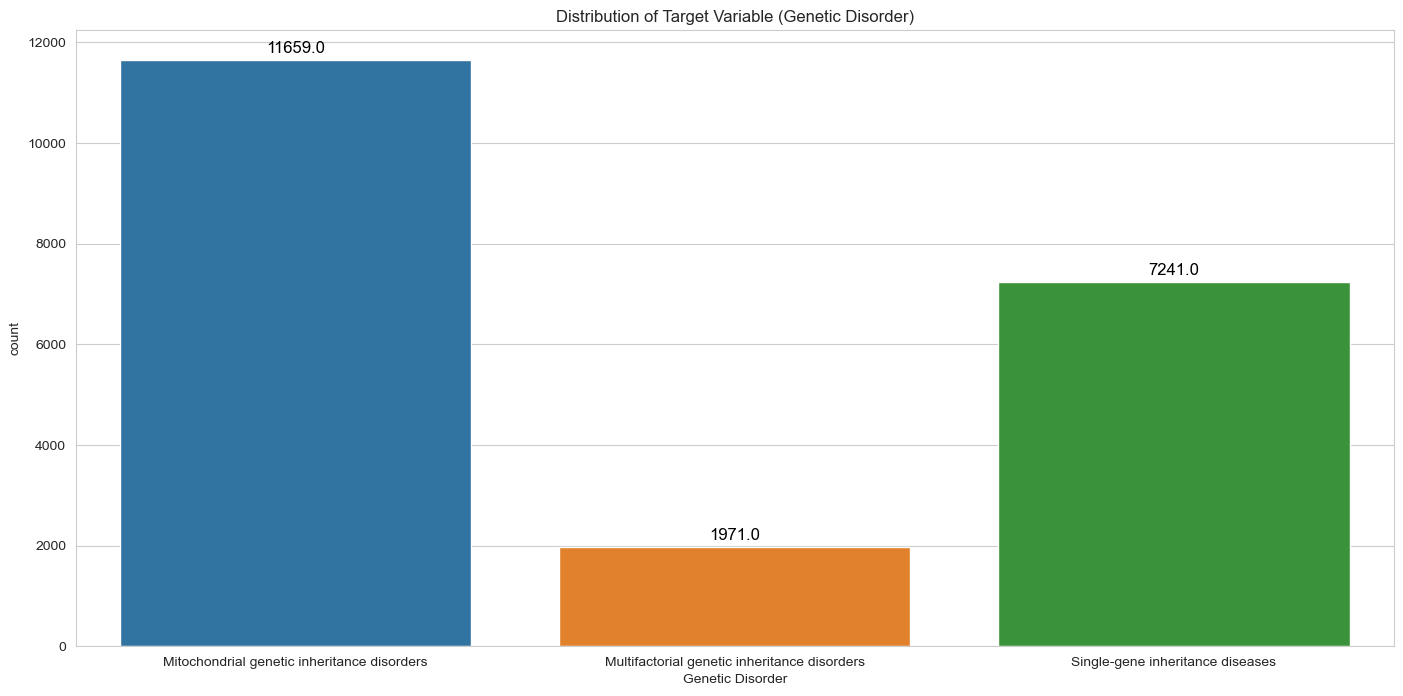

In [46]:
sns.set_style("whitegrid")
plt.figure(figsize=(17, 8))
ax = sns.countplot(x=train_df['Genetic Disorder'])
plt.title('Distribution of Target Variable (Genetic Disorder)')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()


## Inference : The Mitochondrial genetic inheritance disorders are seen more from the analysis.

## 4] Which Disorder sublass frequency is high?

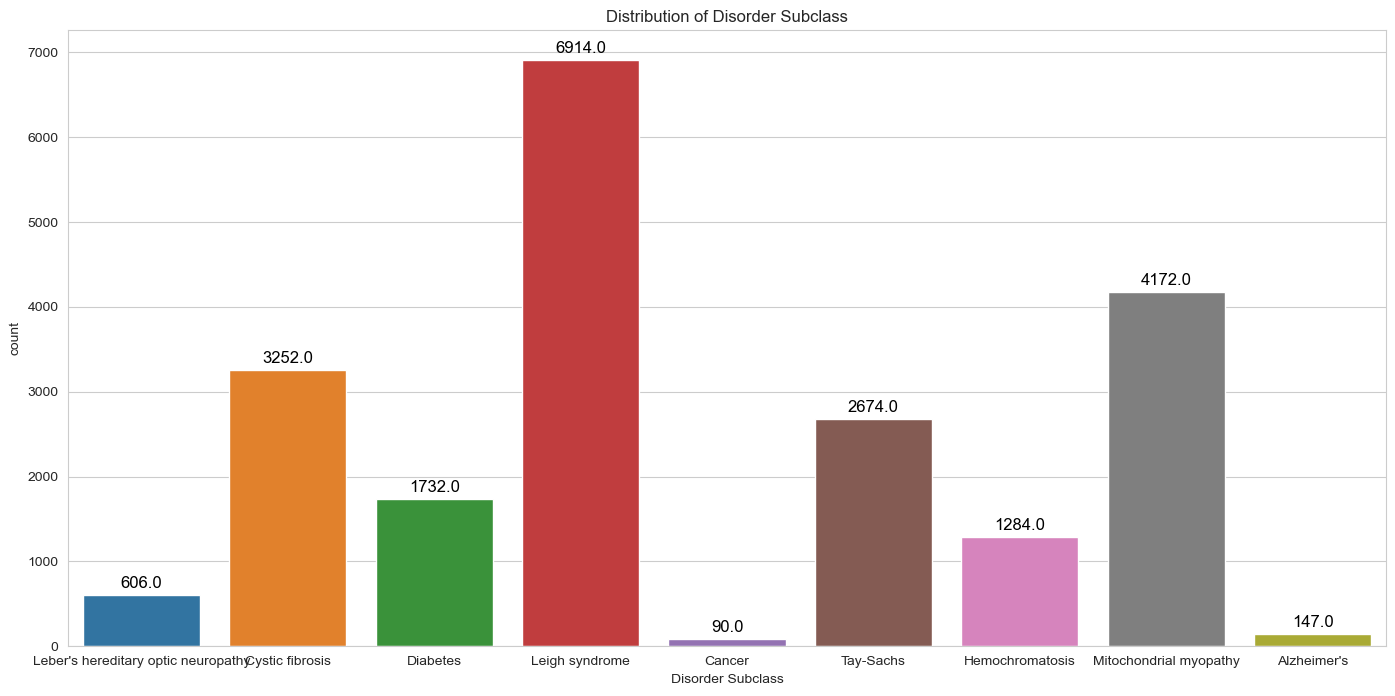

In [47]:
sns.set_style("whitegrid")
plt.figure(figsize=(17, 8))
ax = sns.countplot(x=train_df['Disorder Subclass'])
plt.title('Distribution of Disorder Subclass')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Inference : We can infer that Leigh Syndrome disorder subclass is seen more among all the subclasses in the patients

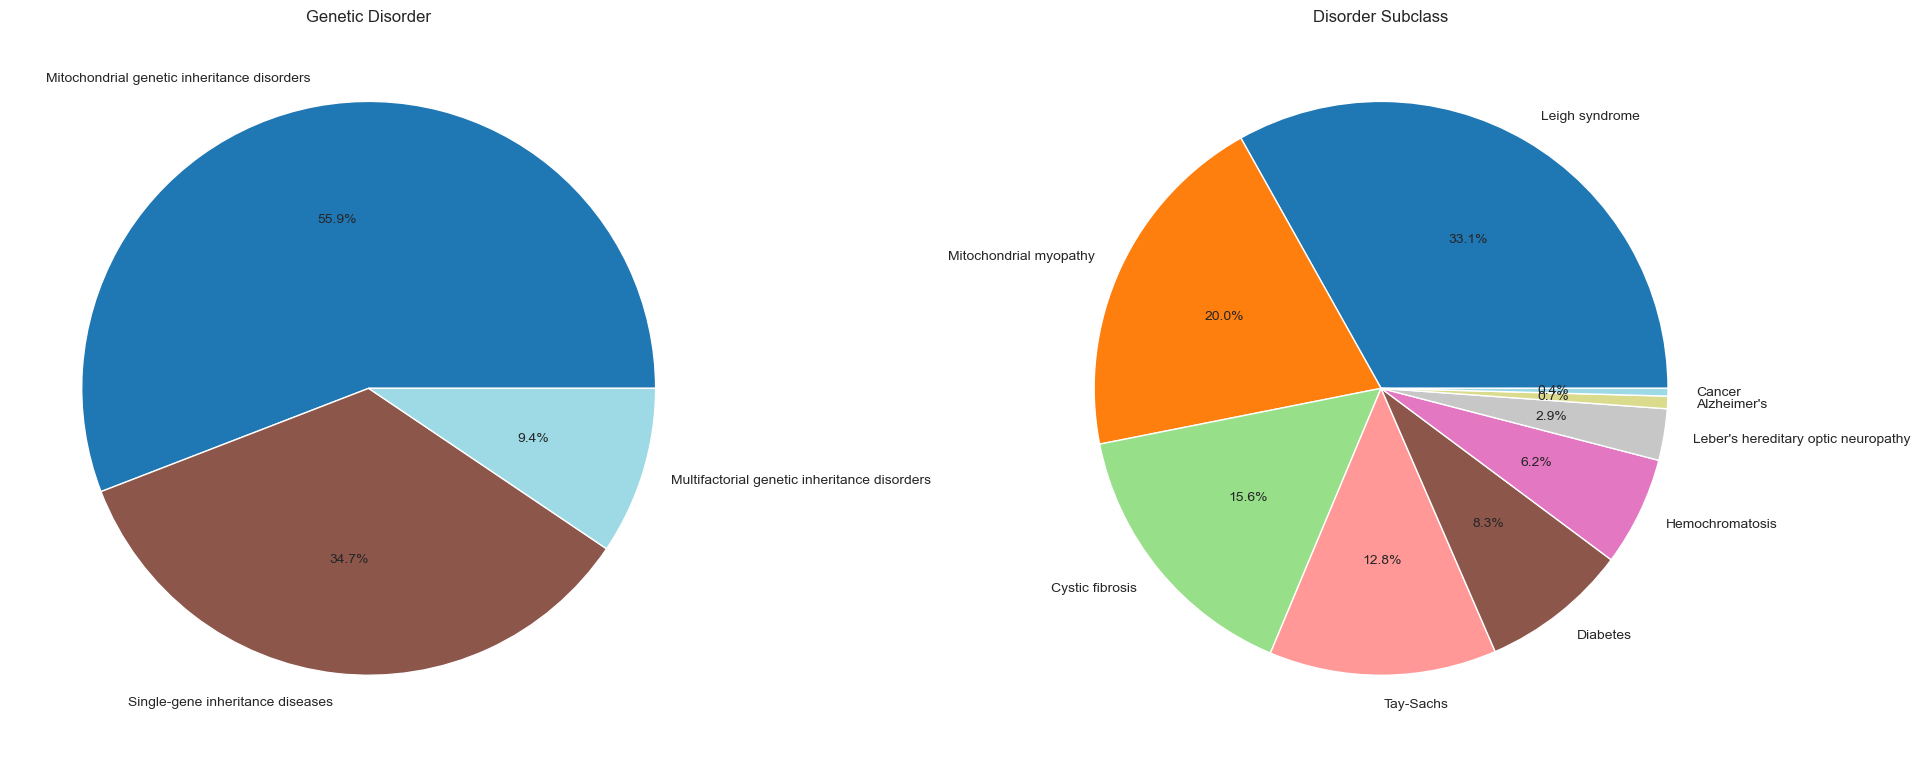

In [48]:
categorical_variables = [
    'Genetic Disorder','Disorder Subclass']

plt.figure(figsize=(20, 15))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 2, i)
    counts = train_df[variable].value_counts()
    colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(variable)
plt.tight_layout()
plt.show()

## 5]Which age group is is more affected with the Disorder?

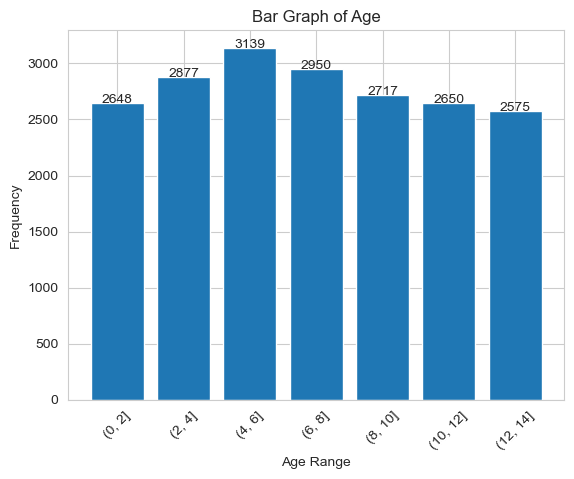

<Figure size 30x30 with 0 Axes>

In [49]:
ages =train_df['Patient Age']
bins = [0, 2, 4, 6, 8, 10, 12, 14]
age_ranges = pd.cut(ages, bins)
age_counts = age_ranges.value_counts().sort_index()
plt.bar(age_counts.index.astype(str), age_counts.values)
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Bar Graph of Age')
for i, freq in enumerate(age_counts.values):
    plt.text(i, freq + 0.1, str(freq), ha='center')
    plt.xticks(rotation=45)
plt.figure(figsize=(0.3,0.3))
plt.show()

## Inference : The age Group between between 4-6 are highy to be diagnosed with the genetic disorder. 

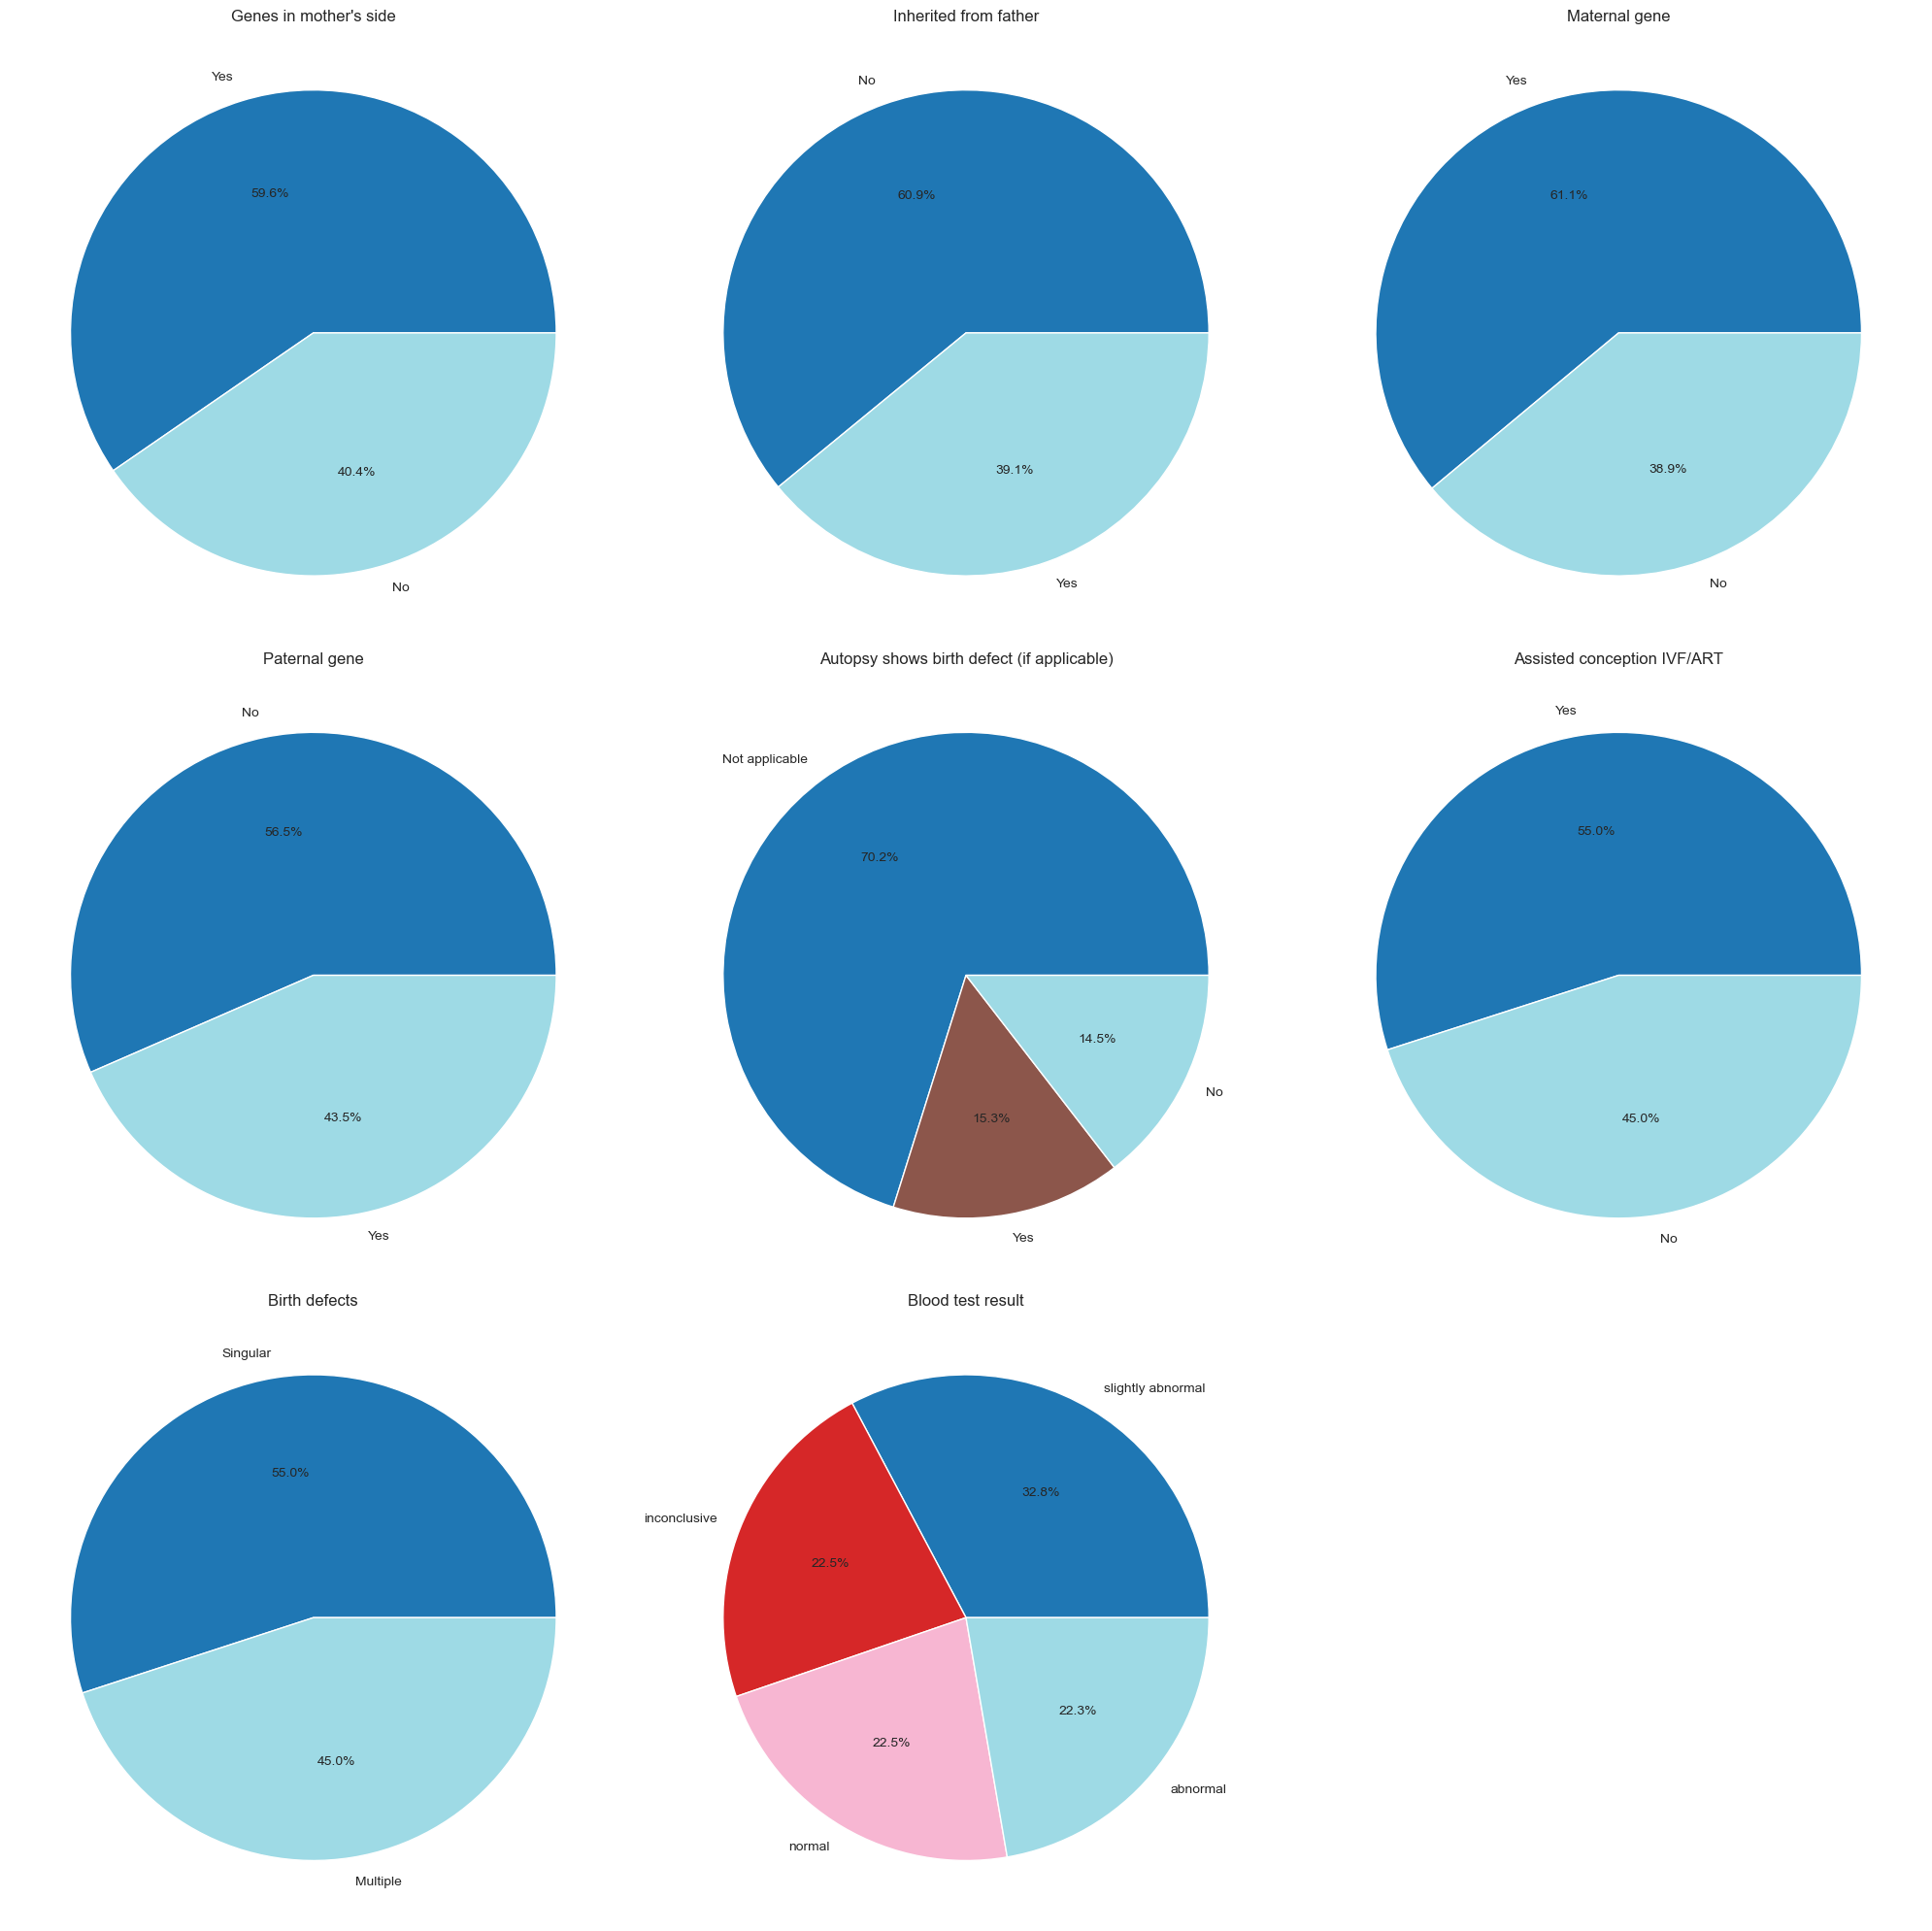

In [50]:
categorical_variables = [
    "Genes in mother's side",'Inherited from father','Maternal gene','Paternal gene',
    "Autopsy shows birth defect (if applicable)",
    "Assisted conception IVF/ART",
    "Birth defects",
    "Blood test result"
]

plt.figure(figsize=(20, 20))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(3, 3, i)
    counts = train_df[variable].value_counts()
    colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(variable)
plt.tight_layout()
plt.show()

# Bivariate Analysis

## 1]Is there a relationship between respiratory rate and genetic disorders?

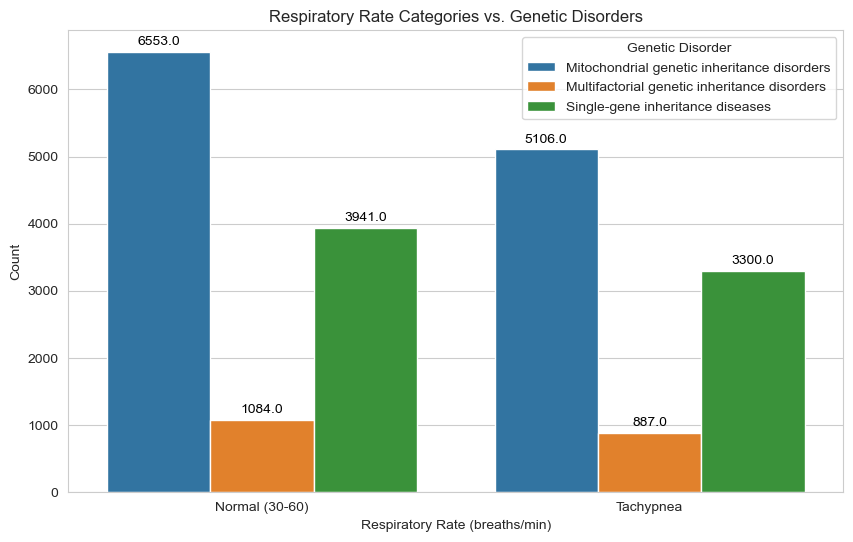

In [51]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Respiratory Rate (breaths/min)', hue='Genetic Disorder', data=train_df)
plt.title("Respiratory Rate Categories vs. Genetic Disorders")
plt.xlabel('Respiratory Rate (breaths/min)')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder', loc='upper right')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Inference : It can bee seen that all the genetic disorders in Normal breathe rate range is Higher

## 2] What could you infer by bringing out the relationship between Birth Asphyxia and Genetic Disorder?

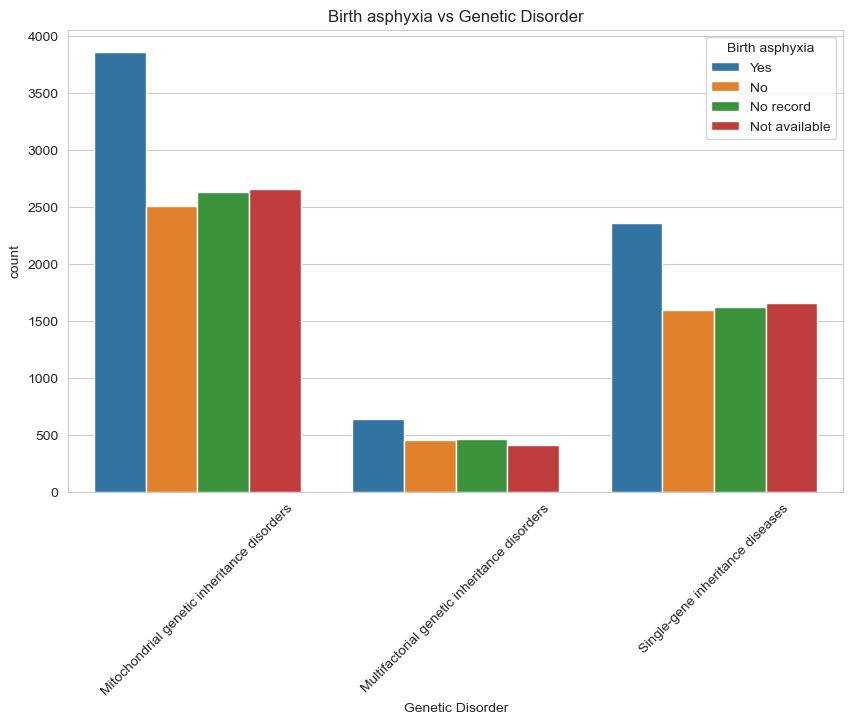

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Genetic Disorder', hue='Birth asphyxia', data=train_df)
plt.xticks(rotation=45)
plt.title('Birth asphyxia vs Genetic Disorder')
plt.show()


## Inference : Through the graph we can predict that if there is presence of Birth Asphyxia then there is higher chance of getting Genetic disorde

# 3] What do we infer from the genetic disorder with male and female gender?

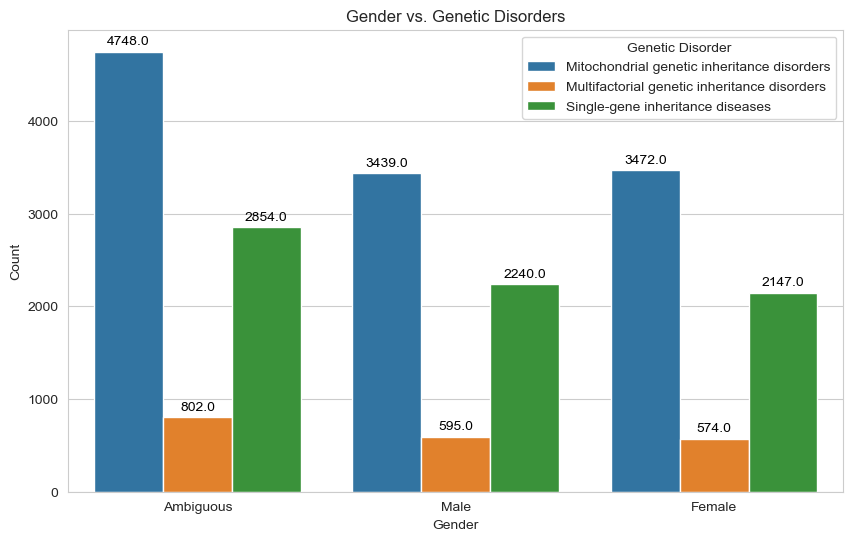

In [53]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='Genetic Disorder', data=train_df)
plt.title("Gender vs. Genetic Disorders")
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder', loc='upper right')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

## Inference: We are not going to consider Ambiguous as we are not confirmed what to assume for ambiguous hence we only consider Male and females under consideration when comparing with Genetic disorder.

## There is not much difference between genetic disorder with specific gender ,they are almost same.

# 4]What is the status of person with the genetic disorder?

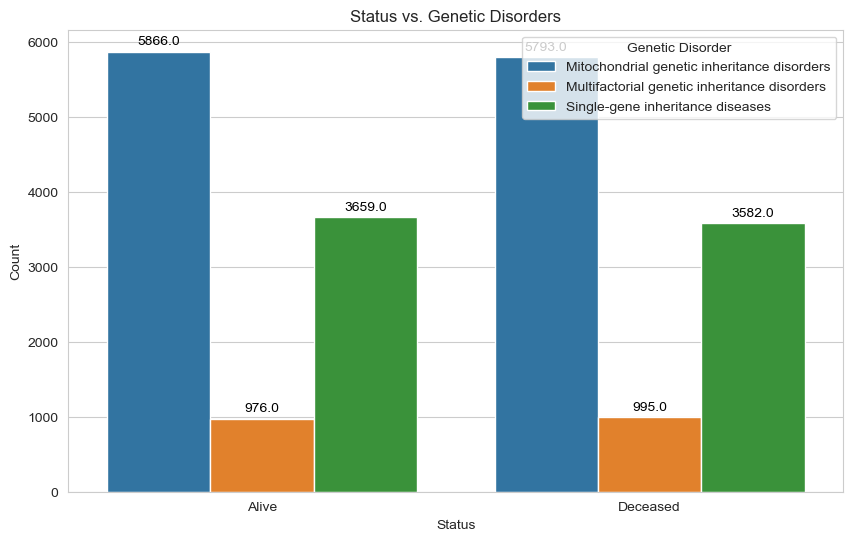

In [54]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Status', hue='Genetic Disorder', data=train_df)
plt.title("Status vs. Genetic Disorders")
plt.xlabel('Status')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder', loc='upper right')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Inference: We can see that there is almost same people of alive and deceased count with each genetic disorder.Deceased here refers dead person only

## 5] What is the relation between Genetic disorder vs Birth Defect?

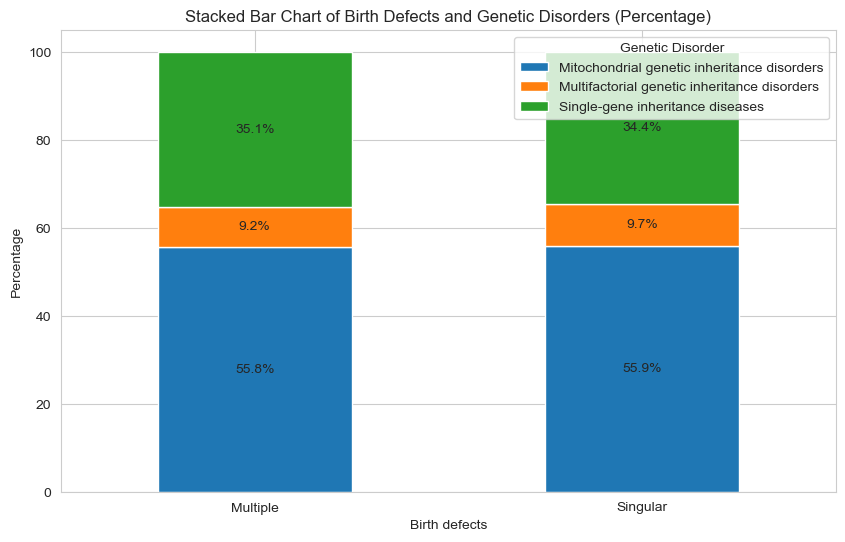

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the data and creating the stacked bar data
stacked_data = train_df.groupby(['Birth defects', 'Genetic Disorder']).size().unstack()

# Normalize the data to get percentages
stacked_data_percentage = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100

# Creating the plot with adjustable figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

stacked_data_percentage.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Birth defects')
ax.set_ylabel('Percentage')
plt.xticks(rotation=0)
plt.title('Stacked Bar Chart of Birth Defects and Genetic Disorders (Percentage)')

# Adding percentages on the bars
for c in ax.containers:
    labels = [f'{v.get_height():.1f}%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c, labels=labels, label_type='center')

plt.show()


## Inference : Except the Single-gene Inheritance disease genetic disorder ,all other Genetic disorder are more with singular Birth defect person .

# 6] What is relationship between person with gene in mother side vs Genetic disorder?

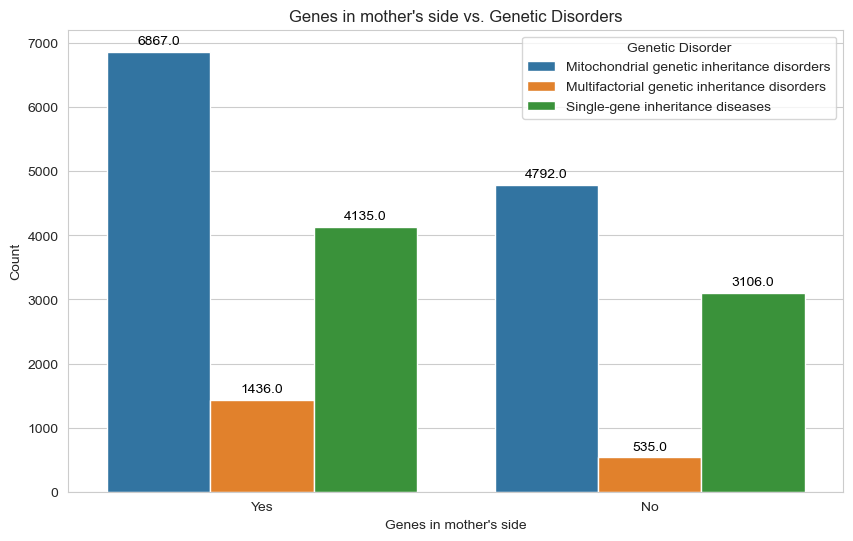

In [142]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x="Genes in mother's side", hue='Genetic Disorder', data=train_df)
plt.title("Genes in mother's side vs. Genetic Disorders")
plt.xlabel("Genes in mother's side")
plt.ylabel('Count')
plt.legend(title='Genetic Disorder', loc='upper right')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Genes inherited from mother side have having higher rate of getting genetic disorders

# 7]Which genetic subclass disorder patients have higher rate of getting their types of Genetic disorder?

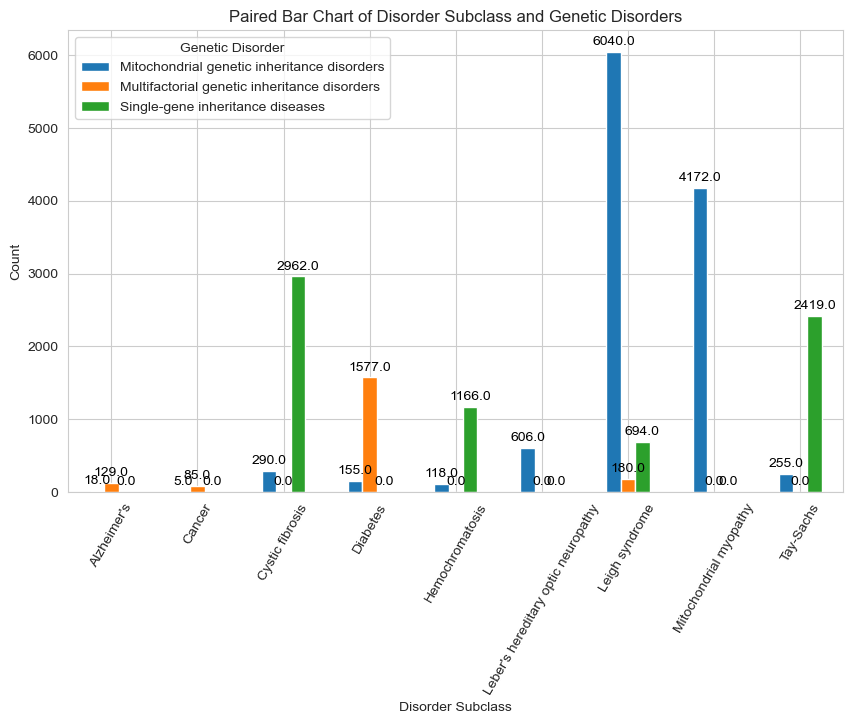

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the data and creating the paired bar data
paired_data = train_df.groupby(['Disorder Subclass', 'Genetic Disorder']).size().unstack()

# Creating the plot with adjustable figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

paired_data.plot(kind='bar', ax=ax)
ax.set_xlabel('Disorder Subclass')
ax.set_ylabel('Count')
plt.xticks(rotation=60)
plt.title('Paired Bar Chart of Disorder Subclass and Genetic Disorders')

# Annotate the bars with the count of frequencies
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


## We can infere that the Mitochondrial Genetic inheritance disorder is high for Hemochromatosis Patients ,Multifactorial genetic inheritance disorder is high for Leigh Syndrome Patients, Single gene inherited disease is high for Diabetes patients.

## Also Leigh Syndrome is the only disorder subclass which can be seen in all the Genetic disorder

# 8]How does the frequency of genetic disorders vary based on the type of genes inherited from parents?

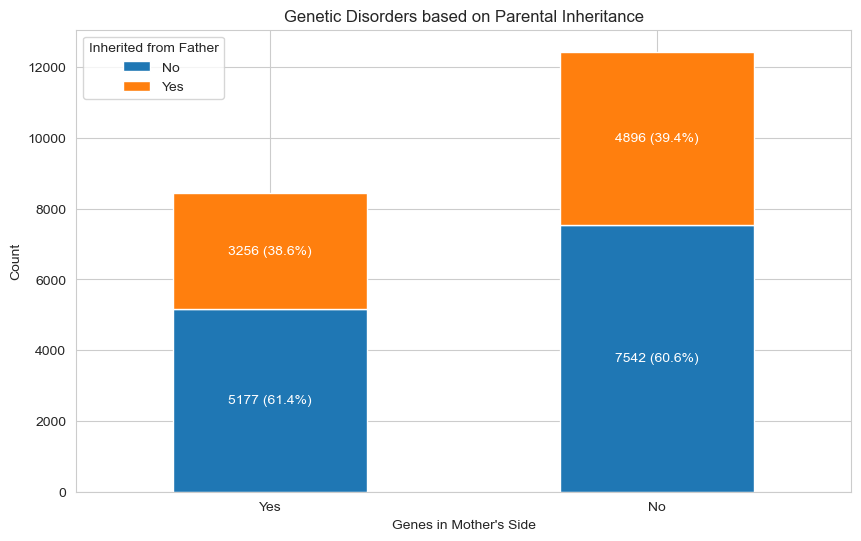

In [162]:
inheritance_counts = pd.crosstab(train_df["Genes in mother's side"], train_df['Inherited from father'])

# Plot the stacked bar plot
ax = inheritance_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Genetic Disorders based on Parental Inheritance")
plt.xlabel("Genes in Mother's Side")
plt.ylabel("Count")
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'], rotation=0)
plt.legend(title='Inherited from Father')

# Annotate counts and percentages
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x()
    y = p.get_y()
    
    # Calculate percentage
    total = sum([patch.get_height() for patch in ax.patches if patch.get_x() == x and patch.get_width() == width])
    percentage = f'{(height / total * 100):.1f}%'
    
    # Annotate the plot with count and percentage
    ax.annotate(f'{int(height)} ({percentage})', (x + width / 2., y + height / 2.), ha='center', va='center', fontsize=10, color='white')

plt.show()

-> This stacked bar plot shows the distribution of different genetic disorders based on whether they are inherited from the mother's side or the father's side.

-> Comparing the heights of the bars can reveal any patterns or differences in the prevalence of genetic disorders based on parental inheritance.

## 9]How Autopsy shows birth defect (if applicable) related to Genetic Disorder?

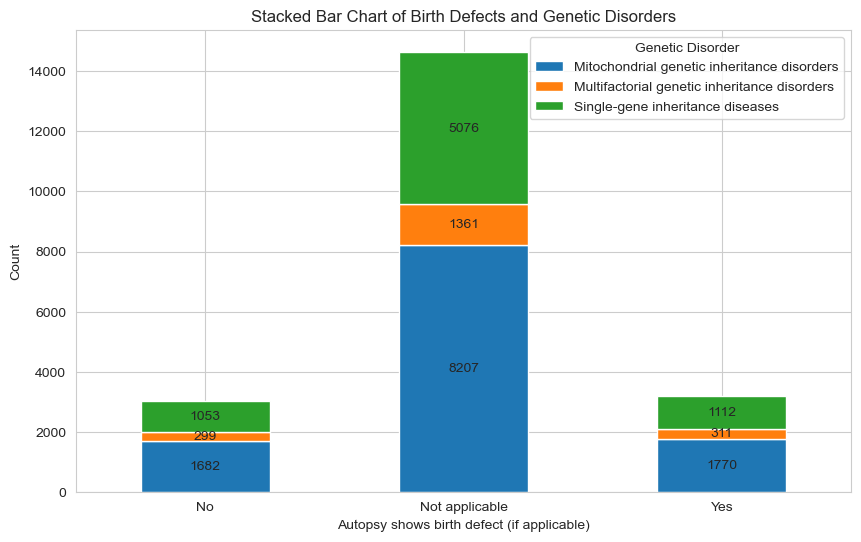

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping the data and creating the stacked bar data
stacked_data = train_df.groupby(['Autopsy shows birth defect (if applicable)', 'Genetic Disorder']).size().unstack()

# Creating the plot with adjustable figure size
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the width and height as needed

# Plotting the stacked bar chart
stacked_data.plot(kind='bar', stacked=True, ax=ax)

# Setting x-axis label, y-axis label, and title if needed
ax.set_xlabel('Autopsy shows birth defect (if applicable)')
ax.set_ylabel('Count')
plt.xticks(rotation=0)
plt.title('Stacked Bar Chart of Birth Defects and Genetic Disorders')

# Adding count number annotations inside each bar
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Display the plot
plt.show()


## Inference : Person having Birth defect and person not having birth defect have an almost equal chances of getting diagnosed with the all types of Genetic disorder

## 10]"Higher 'Heart Rate (rates/min)' is associated with an increased likelihood of being diagnosed with a 'Genetic Disorder'."

<Figure size 1000x600 with 0 Axes>

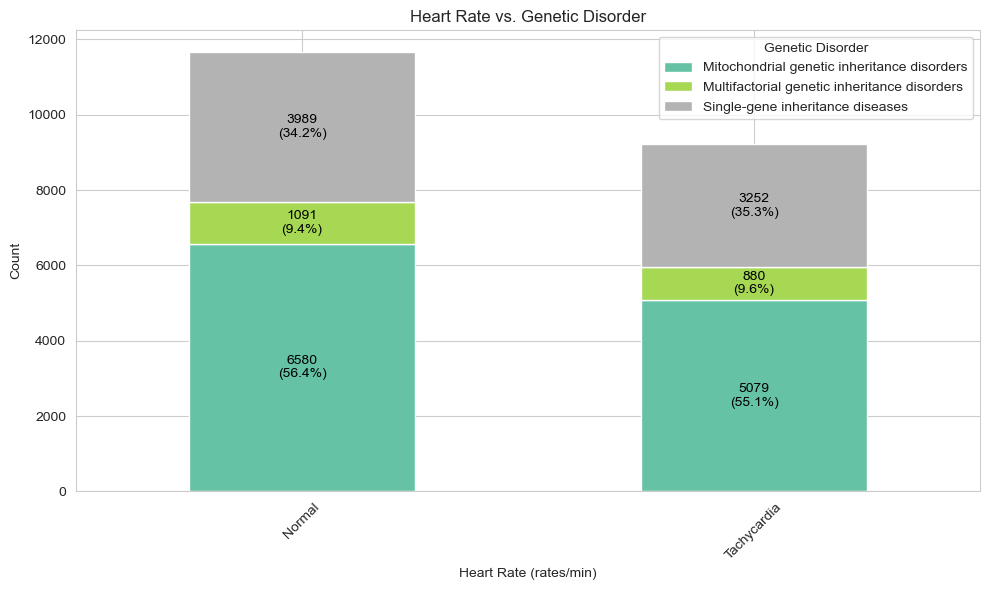

In [71]:
# Calculate the counts and percentages
counts = train_df.groupby(['Heart Rate (rates/min', 'Genetic Disorder']).size().reset_index(name='Count')
total_counts = counts.groupby('Heart Rate (rates/min')['Count'].transform('sum')
counts['Percentage'] = counts['Count'] / total_counts * 100

# Create a pivot table for easier plotting
pivot_counts = counts.pivot(index='Heart Rate (rates/min', columns='Genetic Disorder', values='Count').fillna(0)
pivot_percentages = counts.pivot(index='Heart Rate (rates/min', columns='Genetic Disorder', values='Percentage').fillna(0)

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = pivot_counts.plot(kind='bar', stacked=True, colormap='Set2', figsize=(10, 6))

# Annotate percentages on the bars
for i in range(pivot_counts.shape[0]):
    for j in range(pivot_counts.shape[1]):
        count = pivot_counts.iloc[i, j]
        if count > 0:
            percentage = pivot_percentages.iloc[i, j]
            if j == 0:  # For 'Normal' category
                plt.text(i, pivot_counts.iloc[:, :j+1].sum(axis=1)[i] - count / 2,
                         f'{count}\n({percentage:.1f}%)', ha='center', va='center', fontsize=10, color='black')
            else:
                plt.text(i, pivot_counts.iloc[:, :j].sum(axis=1)[i] + count / 2,
                         f'{count}\n({percentage:.1f}%)', ha='center', va='center', fontsize=10, color='black')

plt.title("Heart Rate vs. Genetic Disorder")
plt.xlabel('Heart Rate (rates/min)')
plt.ylabel('Count')
plt.legend(title='Genetic Disorder', loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The Stacked bar chart with percentages helps us understand how different genetic disorders are distributed across various heart rate ranges. It reveals the prevalence of each disorder within different heart rate groups, providing insights into potential associations between heart rate and genetic conditions.

## 11]Is the distribution of 'Patient Age' different for those with and without 'Genetic Disorder'?¶

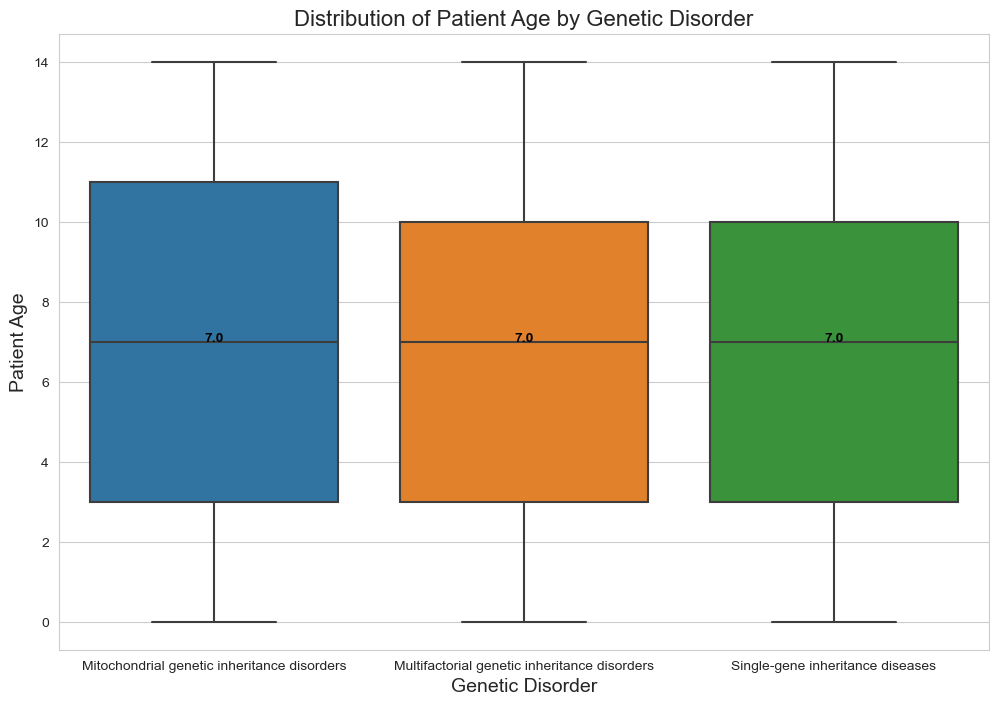

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate medians
medians = train_df.groupby('Genetic Disorder')['Patient Age'].median()

# Create a larger box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genetic Disorder', y='Patient Age', data=train_df)
plt.title("Distribution of Patient Age by Genetic Disorder", fontsize=16)
plt.xlabel('Genetic Disorder', fontsize=14)
plt.ylabel('Patient Age', fontsize=14)

# Annotate the medians on the plot
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.1f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.show()

### Inference:

The box plot will visually show the distribution of 'Patient Age' for those with and without genetic disorders. The medians are annotated on the plot for clarity.

### Conclusion:

If there is a significant difference in the median and spread of 'Patient Age' between the groups, it suggests that patient age may be a factor in the occurrence of genetic disorders.

## 12] Is there a significant association between 'Assisted conception IVF/ART' and 'Genetic Disorder'?

<Figure size 1200x800 with 0 Axes>

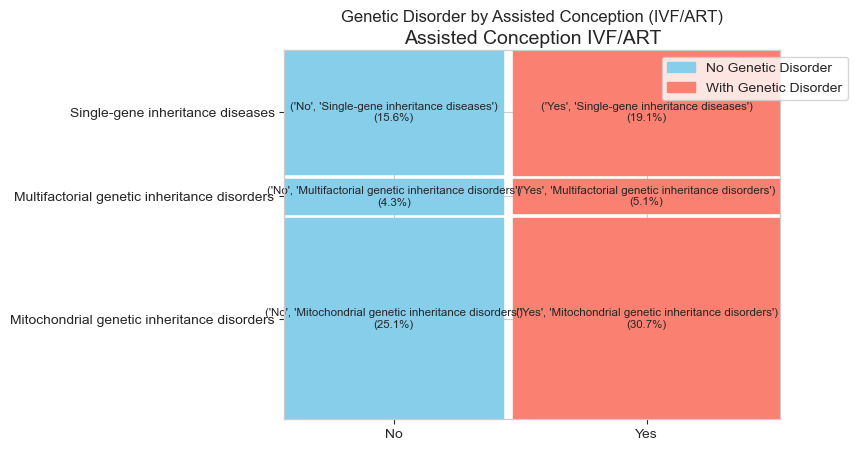

In [75]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.patches as mpatches

# Prepare the data for the mosaic plot
mosaic_data = train_df[['Assisted conception IVF/ART', 'Genetic Disorder']].value_counts().unstack().fillna(0)

# Create the mosaic plot
plt.figure(figsize=(12, 8))
ax = mosaic(mosaic_data.stack(), gap=0.02, title='Genetic Disorder by Assisted Conception (IVF/ART)', labelizer=lambda k: f"{k}\n({mosaic_data.stack().loc[k] / mosaic_data.stack().sum() * 100:.1f}%)", properties=lambda key: {'color': 'skyblue' if 'No' in key else 'salmon'})

# Set labels and display plot
plt.xlabel('Assisted Conception IVF/ART', fontsize=14)
plt.ylabel('Genetic Disorder', fontsize=14)

# Create custom legend patches
blue_patch = mpatches.Patch(color='skyblue', label='No Genetic Disorder')
red_patch = mpatches.Patch(color='salmon', label='With Genetic Disorder')

# Add legend
plt.legend(handles=[blue_patch, red_patch], loc='upper right', bbox_to_anchor=(1.15, 1))

plt.show()

## The mosaic plot will visually display the proportions of genetic disorders within each category of assisted conception, highlighting any potential associations between the two variables .
## A significant difference in the areas of the mosaic tiles between categories would suggest that assisted conception methods may influence the likelihood of genetic disorders.

.

## External hypothesis

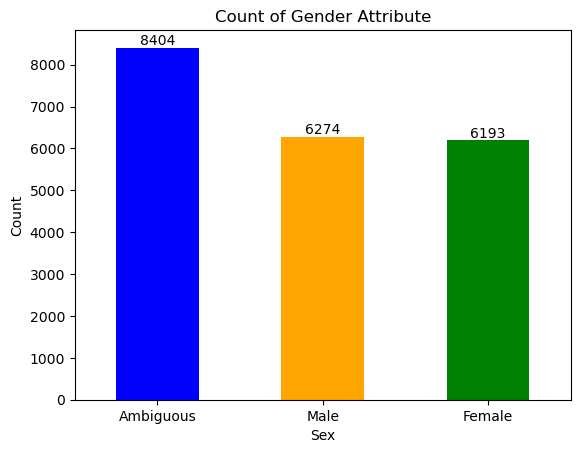

<Figure size 1x1 with 0 Axes>

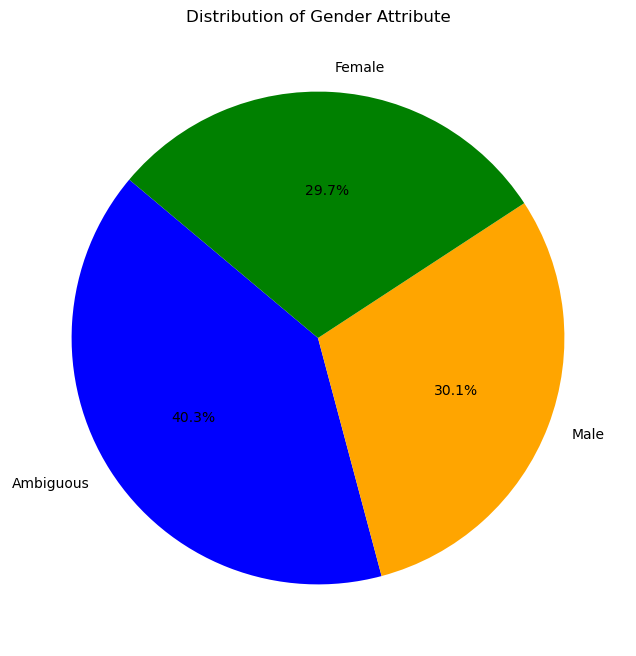

In [27]:
sex_counts = train_df['Gender'].value_counts()
ax = sex_counts.plot(kind='bar', color=['blue', 'orange','green'])
for i, count in enumerate(sex_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')   
plt.title('Count of Gender Attribute')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.figure(figsize=(0.01,0.01))
plt.show()

plt.figure(figsize=(8, 8))
sex_counts.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green'], startangle=140)
plt.title('Distribution of Gender Attribute')
plt.ylabel('')  # Hide the y-label
plt.show()

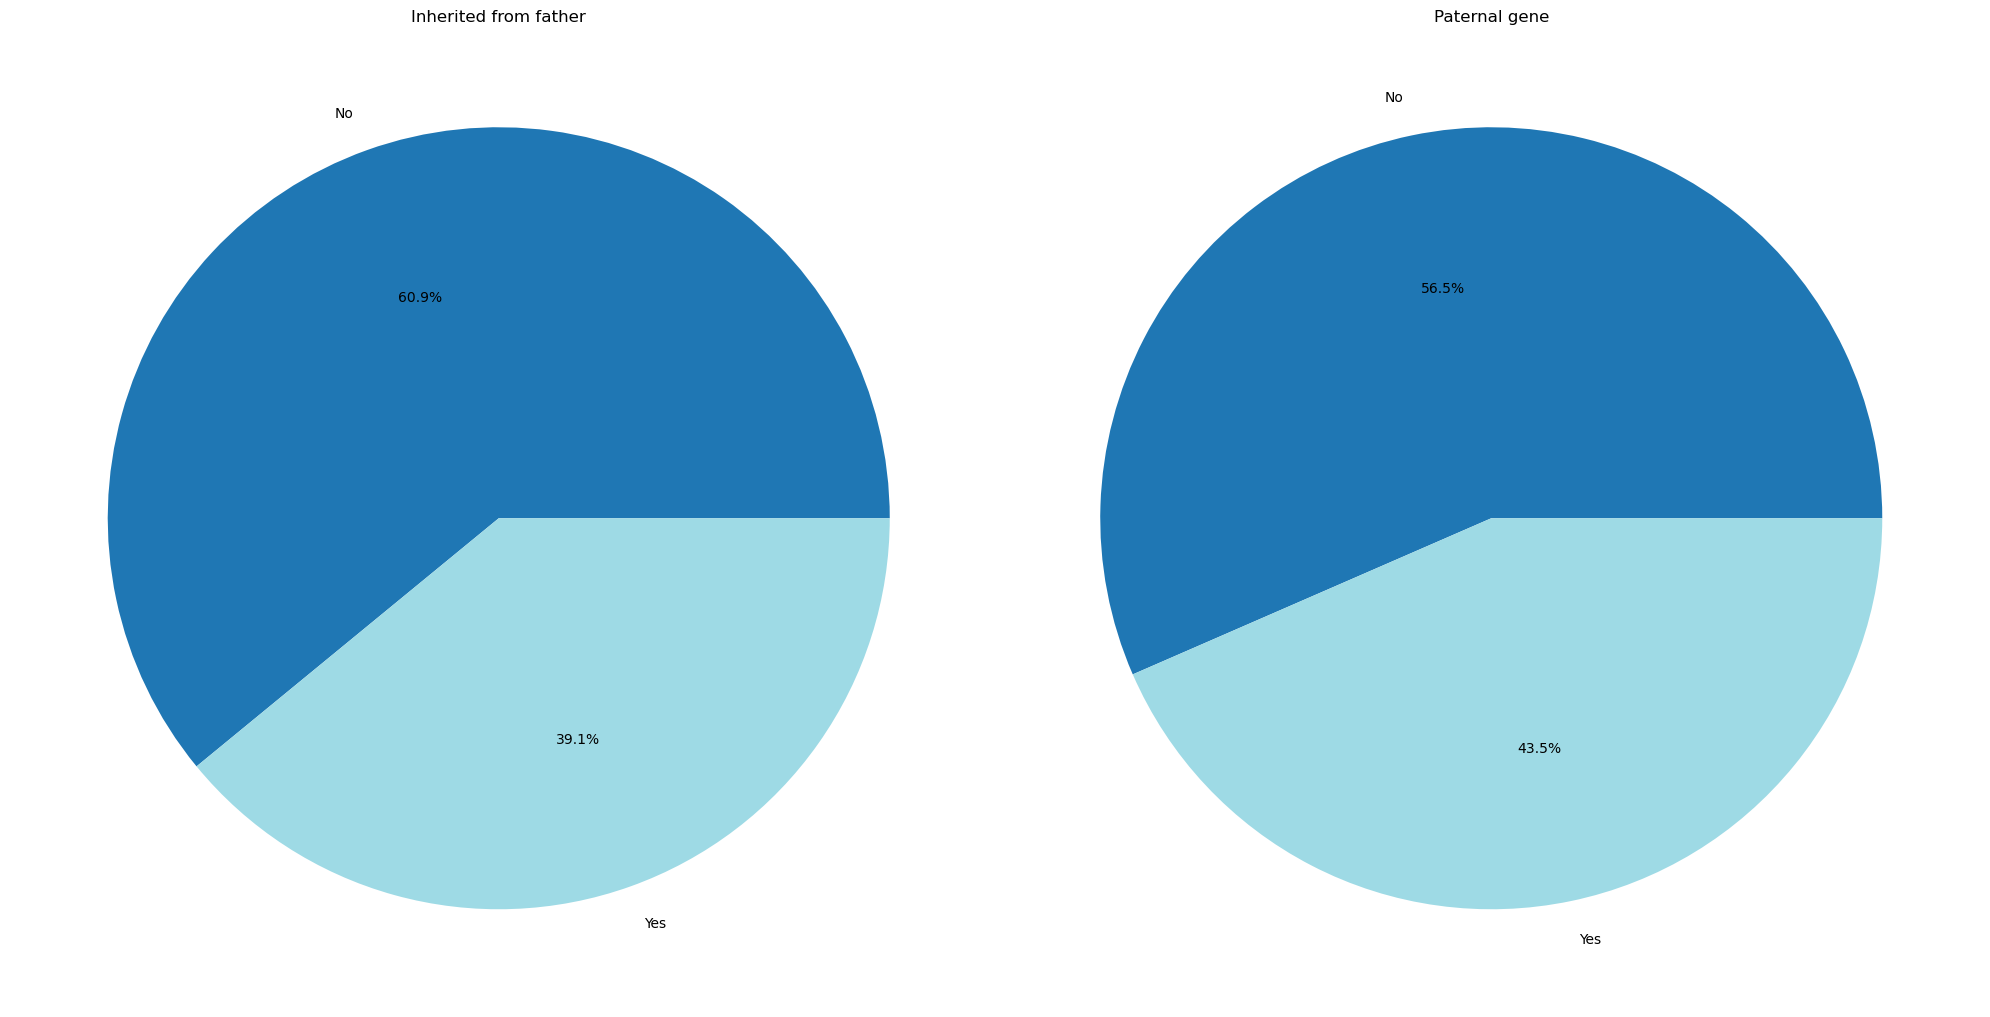

In [29]:
categorical_variables = [
    'Inherited from father','Paternal gene',
]

plt.figure(figsize=(20, 20))
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(1, 2, i)
    counts = train_df[variable].value_counts()
    colors = plt.cm.tab20(np.linspace(0, 1, len(counts)))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=colors)
    plt.title(variable)
plt.tight_layout()
plt.show()

## We can see that the person NOT inherited from father has the higher rate of getting genetic disorder also implies same with Paternal gene.

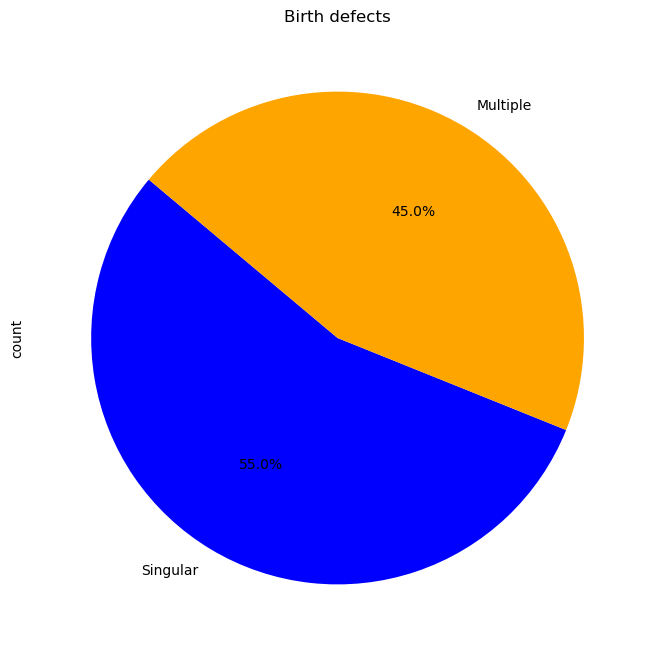

In [33]:
npa= train_df['Birth defects'].value_counts()
plt.figure(figsize=(8, 8))
npa.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.title('Birth defects')  # Hide the y-label
plt.show()

## Singular birth defect people are more affected to genetic disorder
